### Exploratory and Descriptive Data Analysis

### Question 1:

##### **Aim** : To test the hypothesis that the statistics of “affordable housing projects” (government housing for low-income people) in a ZIP code has a relation to the health inspection scores of the restaurants in that ZIP code.



##### **Data** : Public data sources of the city "Los Angeles"

##### https://catalog.data.gov/dataset/restaurant-and-market-health-inspections

##### https://catalog.data.gov/dataset/hcidla-affordable-housing-projects-list-2003-to-present


### b) Performing EDA on the given data

#### Importing required libraries and packages

In [1]:
# Importing the necessary libraries and packages

import numpy as np   # For Numerical operations
import pandas as pd  # For Data manipulation
import matplotlib.pyplot as plt  # For Data visualization
import seaborn as sns   # For Statistical data visualization
import scipy.stats as stats  # For Statistical functions



#### Uploading data files


In [2]:
# Uploading the data files

# Colab-specific library to load files
from google.colab import files

# Uploading the given data files
uploaded = files.upload()

# Confirming the upload
for fn in uploaded.keys():
  print('You uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv to LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv
Saving Restaurant_and_Market_Health_Inspections.csv to Restaurant_and_Market_Health_Inspections.csv
You uploaded file "LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv" with length 322028 bytes
You uploaded file "Restaurant_and_Market_Health_Inspections.csv" with length 16596506 bytes


### Exploring the Housing data


In [3]:
# reading the csv file into a pandas dataframe
df1 = pd.read_csv('LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv')

# printing first five rows of the dataframe to get an overview of the data
df1.head()


APN PROJECT NUMBER                       NAME DEVELOPMENT STAGE  \
0  5143020023      02-118256       SAN LUCAS APARTMENTS        In-Service   
1  5050011005      05-117193     LEEWARD APTS. (SITE 7)        In-Service   
2  5114014020      14-121652    FLORENCE MILLS (SITE 5)        In-Service   
3  4012018025          60013  MORGAN PLACE SENIOR APTS.        In-Service   
4  5153030026          50036             WITMER HEIGHTS        In-Service   

  CONSTRUCTION TYPE                                       SITE ADDRESS  \
0  NEW CONSTRUCTION               1221 W 7TH ST  Los Angeles, CA 90017   
1             REHAB            2809 S WEST BLVD  Los Angeles, CA 90016   
2  NEW CONSTRUCTION  1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...   
3  NEW CONSTRUCTION        7305 S CRENSHAW BLVD  Los Angeles, CA 90043   
4               NaN             116 S WITMER ST  Los Angeles, CA 90026   

   SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  ...  \
0                       1       1           WESTLAKE         196  ...   
1                      10       7  CRENSHAW DISTRICT           0  ...   
2                       9       5            CENTRAL           0  ...   
3                       8       1          HYDE PARK          55  ...   
4                      13       1     TEMPLE-BEAUDRY          49  ...   

                MANAGEMENT COMPANY   CONTACT PHONE  \
0         GSL PROPERRTY MANAGEMENT             NaN   
1  ALPHA PROPERTY MANAGEMENT, INC.  (323) 231-4174   
2   BARKER MANAGEMENT INCORPORATED  (714) 533-3450   
3                ABODE COMMUNITIES  (213) 225-2772   
4         THE JOHN STEWART COMPANY  (213) 482-9122   

                                               PHOTO   JOBS  \
0  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
1  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
2  click here (http://hcidapp.lacity.org/mpphotos...  226.0   
3  click here (http://hcidapp.lacity.org/mpphotos...  110.0   
4  click here (http://hcidapp.lacity.org/mpphotos...   95.0   

                                 PROJECT SUMMARY URL  CONTRACT NUMBERS  \
0  click here (http://hcidapp.lacity.org/ahtfRepo...               NaN   
1  click here (http://hcidapp.lacity.org/ahtfRepo...               NaN   
2  click here (http://hcidapp.lacity.org/ahtfRepo...          C-129358   
3  click here (http://hcidapp.lacity.org/ahtfRepo...          C-111486   
4  click here (http://hcidapp.lacity.org/ahtfRepo...          C-109452   

                DATE STAMP  SITE LONGITUDE  SITE LATITUDE  \
0  2024-08-05T00:00:00.000      -118.26584       34.05235   
1  2024-08-05T00:00:00.000      -118.34182       34.03071   
2  2024-08-05T00:00:00.000      -118.25740       34.01115   
3  2024-08-05T00:00:00.000      -118.33139       33.97355   
4  2024-08-05T00:00:00.000      -118.26086       34.06173   

             GPS_COORDS ON MAP  
0  POINT (-118.26584 34.05235)  
1  POINT (-118.34182 34.03071)  
2   POINT (-118.2574 34.01115)  
3  POINT (-118.33139 33.97355)  
4  POINT (-118.26086 34.06173)  

[5 rows x 31 columns]

In [4]:
# Printing the number of columns and rows
print('Number of Rows =', df1.shape[0])  # printing no of rows
print('Number of Columns =', df1.shape[1])  # printing no of columns

Number of Rows = 595
Number of Columns = 31


In [5]:
# Printing the datatype of each column
print(df1.dtypes)

APN                          int64
PROJECT NUMBER              object
NAME                        object
DEVELOPMENT STAGE           object
CONSTRUCTION TYPE           object
SITE ADDRESS                object
SITE  COUNCIL DISTRICT       int64
SITE #                       int64
SITE COMMUNITY              object
SITE UNITS                   int64
PROJECT TOTAL UNITS          int64
HOUSING TYPE                object
SUPPORTIVE HOUSING          object
SH UNITS PER SITE            int64
DATE FUNDED                 object
LAHD FUNDED                float64
LEVERAGE                   float64
TAX EXEMPT CONDUIT BOND      int64
TDC                        float64
IN-SERVICE DATE             object
DEVELOPER                   object
MANAGEMENT COMPANY          object
CONTACT PHONE               object
PHOTO                       object
JOBS                       float64
PROJECT SUMMARY URL         object
CONTRACT NUMBERS            object
DATE STAMP                  object
SITE LONGITUDE      

### Observations:

*  If we observe the datatype of each column, some columns require change of datatype to ensure consistency and ease of analysis

* **Date Columns**: 'DATE FUNDED' and 'IN-SERVICE DATE' should be converted to datetime format for proper handling


* **ZIP Code**: Since, 'ZIP code' is not provided separately ,it is extracted from the 'SITE ADDRESS' and standardized(all ZIP code values follow a consistent format)

*   **Object Columns**: Encoding the
categorical columns (DEVELOPMENT STAGE, CONSTRUCTION TYPE, etc.) so that they can be used for modeling

*   Encoding Categorical Columns involves converting non-numeric categorical data into a numerical format so that it can be used in machine learning models














In [6]:
# Converting date columns to datetime
df1['DATE FUNDED'] = pd.to_datetime(df1['DATE FUNDED'], errors='coerce')
df1['IN-SERVICE DATE'] = pd.to_datetime(df1['IN-SERVICE DATE'], errors='coerce')


In [7]:
# checking the change in the format and datatype of the date columns
print(df1['DATE FUNDED'])
print(df1['IN-SERVICE DATE'])

0     2001-11-29
1     2005-05-02
2     2018-12-17
3     2007-04-02
4     2006-01-19
         ...    
590   2021-06-17
591   2018-11-02
592   2018-12-17
593   2010-05-13
594   2006-02-17
Name: DATE FUNDED, Length: 595, dtype: datetime64[ns]
0     2003-01-01
1     2006-01-01
2     2021-01-01
3     2009-01-01
4     2008-01-01
         ...    
590   2024-01-01
591   2022-01-01
592   2021-01-01
593   2012-01-01
594   2008-01-01
Name: IN-SERVICE DATE, Length: 595, dtype: datetime64[ns]


In [8]:
# ZIP codes (present in 'SITE ADDRESS') are extracted and standardized
# Since, ZIP code is in the last 5 digits of the address ,the last five digits are extracted

# Extracting the 5-digit ZIP code from the end of the 'SITE ADDRESS' column
df1['ZIP'] = df1['SITE ADDRESS'].str.extract(r'(\d{5})$')

# Converting the extracted ZIP codes to strings and padding them with leading zeros to ensure they are 5 digits long
df1['ZIP'] = df1['ZIP'].astype(str).str.zfill(5)

##### Why ZIP Codes are Stored as object:

*  Non-Numeric Nature: ZIP codes are not used for arithmetic operations, so there's no need to store them as numeric types.


*   Leading Zeros: ZIP codes may have leading zeros (e.g., 01234), which would be lost if stored as integers.
*  Formatting: ZIP codes may include hyphens (e.g., 12345-6789), which are not numeric characters.








In [9]:
# checking the new column 'ZIP' and its datatype
print(df1['ZIP'])

0      90017
1      90016
2      90011
3      90043
4      90026
       ...  
590    90037
591    90012
592    90011
593    90033
594    90017
Name: ZIP, Length: 595, dtype: object


In [10]:
#Checking for any necessary encoding for categorical columns

# List of columns to be converted to categorical type
categorical_columns = ['DEVELOPMENT STAGE', 'CONSTRUCTION TYPE', 'HOUSING TYPE', 'SUPPORTIVE HOUSING']

 # Converting the specified columns to categorical data type
df1[categorical_columns] = df1[categorical_columns].apply(lambda x: x.astype('category'))


In [11]:
# checking the categorical columns
print(df1[categorical_columns])

    DEVELOPMENT STAGE                CONSTRUCTION TYPE  \
0          In-Service                 NEW CONSTRUCTION   
1          In-Service                            REHAB   
2          In-Service                 NEW CONSTRUCTION   
3          In-Service                 NEW CONSTRUCTION   
4          In-Service                              NaN   
..                ...                              ...   
590        In-Service                 NEW CONSTRUCTION   
591        In-Service            DEMO/NEW CONSTRUCTION   
592        In-Service                 NEW CONSTRUCTION   
593        In-Service  BOTH REHAB AND NEW CONSTRUCTION   
594        In-Service                 NEW CONSTRUCTION   

                       HOUSING TYPE SUPPORTIVE HOUSING  
0                           SENIORS                 No  
1                            FAMILY                 No  
2                     SPECIAL NEEDS                Yes  
3                           SENIORS                 No  
4                 

In [12]:
# Displaying the first 5 rows after making the changes
df1.head()

APN PROJECT NUMBER                       NAME DEVELOPMENT STAGE  \
0  5143020023      02-118256       SAN LUCAS APARTMENTS        In-Service   
1  5050011005      05-117193     LEEWARD APTS. (SITE 7)        In-Service   
2  5114014020      14-121652    FLORENCE MILLS (SITE 5)        In-Service   
3  4012018025          60013  MORGAN PLACE SENIOR APTS.        In-Service   
4  5153030026          50036             WITMER HEIGHTS        In-Service   

  CONSTRUCTION TYPE                                       SITE ADDRESS  \
0  NEW CONSTRUCTION               1221 W 7TH ST  Los Angeles, CA 90017   
1             REHAB            2809 S WEST BLVD  Los Angeles, CA 90016   
2  NEW CONSTRUCTION  1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...   
3  NEW CONSTRUCTION        7305 S CRENSHAW BLVD  Los Angeles, CA 90043   
4               NaN             116 S WITMER ST  Los Angeles, CA 90026   

   SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  ...  \
0                       1       1           WESTLAKE         196  ...   
1                      10       7  CRENSHAW DISTRICT           0  ...   
2                       9       5            CENTRAL           0  ...   
3                       8       1          HYDE PARK          55  ...   
4                      13       1     TEMPLE-BEAUDRY          49  ...   

    CONTACT PHONE                                              PHOTO   JOBS  \
0             NaN  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
1  (323) 231-4174  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
2  (714) 533-3450  click here (http://hcidapp.lacity.org/mpphotos...  226.0   
3  (213) 225-2772  click here (http://hcidapp.lacity.org/mpphotos...  110.0   
4  (213) 482-9122  click here (http://hcidapp.lacity.org/mpphotos...   95.0   

                                 PROJECT SUMMARY URL CONTRACT NUMBERS  \
0  click here (http://hcidapp.lacity.org/ahtfRepo...              NaN   
1  click here (http://hcidapp.lacity.org/ahtfRepo...              NaN   
2  click here (http://hcidapp.lacity.org/ahtfRepo...         C-129358   
3  click here (http://hcidapp.lacity.org/ahtfRepo...         C-111486   
4  click here (http://hcidapp.lacity.org/ahtfRepo...         C-109452   

                DATE STAMP  SITE LONGITUDE  SITE LATITUDE  \
0  2024-08-05T00:00:00.000      -118.26584       34.05235   
1  2024-08-05T00:00:00.000      -118.34182       34.03071   
2  2024-08-05T00:00:00.000      -118.25740       34.01115   
3  2024-08-05T00:00:00.000      -118.33139       33.97355   
4  2024-08-05T00:00:00.000      -118.26086       34.06173   

             GPS_COORDS ON MAP    ZIP  
0  POINT (-118.26584 34.05235)  90017  
1  POINT (-118.34182 34.03071)  90016  
2   POINT (-118.2574 34.01115)  90011  
3  POINT (-118.33139 33.97355)  90043  
4  POINT (-118.26086 34.06173)  90026  

[5 rows x 32 columns]

#### Observations:


*  As we can see from the above data, an extra column for 'ZIP code' is added at the end of the dataframe.

In [13]:
# checking the updated data types
print(df1.dtypes)

APN                                 int64
PROJECT NUMBER                     object
NAME                               object
DEVELOPMENT STAGE                category
CONSTRUCTION TYPE                category
SITE ADDRESS                       object
SITE  COUNCIL DISTRICT              int64
SITE #                              int64
SITE COMMUNITY                     object
SITE UNITS                          int64
PROJECT TOTAL UNITS                 int64
HOUSING TYPE                     category
SUPPORTIVE HOUSING               category
SH UNITS PER SITE                   int64
DATE FUNDED                datetime64[ns]
LAHD FUNDED                       float64
LEVERAGE                          float64
TAX EXEMPT CONDUIT BOND             int64
TDC                               float64
IN-SERVICE DATE            datetime64[ns]
DEVELOPER                          object
MANAGEMENT COMPANY                 object
CONTACT PHONE                      object
PHOTO                             

#### Observations:

*  The data types of the coulmns 'DATE FUNDED', 'IN-SERVICE DATE' and categorical columns (DEVELOPMENT STAGE, CONSTRUCTION TYPE, etc.) are changed as desired




In [14]:
# Counting NaN values for each column and creating a DataFrame

# Calculating the number of NaN values in each column, and reset the index to convert the Series into a DataFrame
null_column_df = df1.isnull().sum().reset_index()

# Renaming the columns of the DataFrame to 'Column_Name' and 'NaN_Count'
null_column_df.columns = ['Column_Name', 'NaN_Count']

# Sorting the DataFrame by the 'NaN_Count' column in ascending order and reset the index
null_column_df = null_column_df.sort_values(by='NaN_Count').reset_index(drop=True)

# Printing the DataFrame
print(null_column_df)

                Column_Name  NaN_Count
0                       APN          0
1             SITE LATITUDE          0
2            SITE LONGITUDE          0
3                DATE STAMP          0
4       PROJECT SUMMARY URL          0
5                     PHOTO          0
6                       TDC          0
7   TAX EXEMPT CONDUIT BOND          0
8                  LEVERAGE          0
9         GPS_COORDS ON MAP          0
10        SH UNITS PER SITE          0
11       SUPPORTIVE HOUSING          0
12              LAHD FUNDED          0
13      PROJECT TOTAL UNITS          0
14           PROJECT NUMBER          0
15                     NAME          0
16             SITE ADDRESS          0
17   SITE  COUNCIL DISTRICT          0
18                      ZIP          0
19               SITE UNITS          0
20                   SITE #          0
21        DEVELOPMENT STAGE          1
22              DATE FUNDED          1
23           SITE COMMUNITY          7
24             HOUSING TY

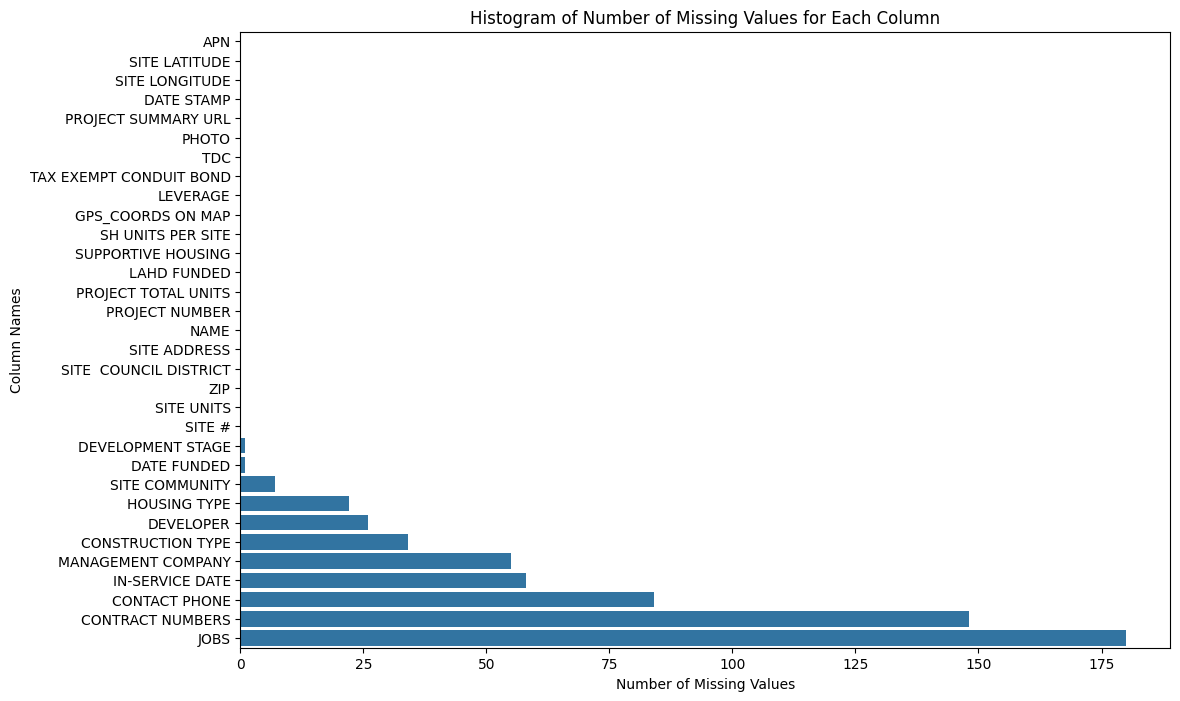

In [15]:
# Plotting the histogram
plt.figure(figsize=(12, 8))  # Creating a new figure with a specified size of 12 inches by 8 inches

# Creating a bar plot using seaborn
sns.barplot(data=null_column_df, x='NaN_Count', y='Column_Name')  # Plotting a bar chart with 'NaN_Count' on the x-axis and 'Column_Name' on the y-axis, using the 'viridis' color palette

# Adding a title to the plot
plt.title('Histogram of Number of Missing Values for Each Column')

# Labelling the x-axis
plt.xlabel('Number of Missing Values')

# Labelling the y-axis
plt.ylabel('Column Names')

# Displaying the plot
plt.show()

In [16]:
# Counting NaN values for each row and creating a DataFrame

# Calculating the number of NaN values in each row (axis=1), then reset the index to convert the Series into a DataFrame
null_row_df = df1.isnull().sum(axis=1).reset_index()

# Renaming the columns of the DataFrame to 'Row_Index' and 'NaN_Count'
null_row_df.columns = ['Row_Index', 'NaN_Count']

# Sorting the DataFrame by the 'NaN_Count' column in ascending order
null_row_df = null_row_df.sort_values(by='NaN_Count').reset_index(drop=True)

# Printing the DataFrame
print(null_row_df)

     Row_Index  NaN_Count
0          594          0
1          264          0
2          501          0
3          260          0
4          503          0
..         ...        ...
590        489          5
591        432          5
592        276          6
593        451          6
594          8          8

[595 rows x 2 columns]


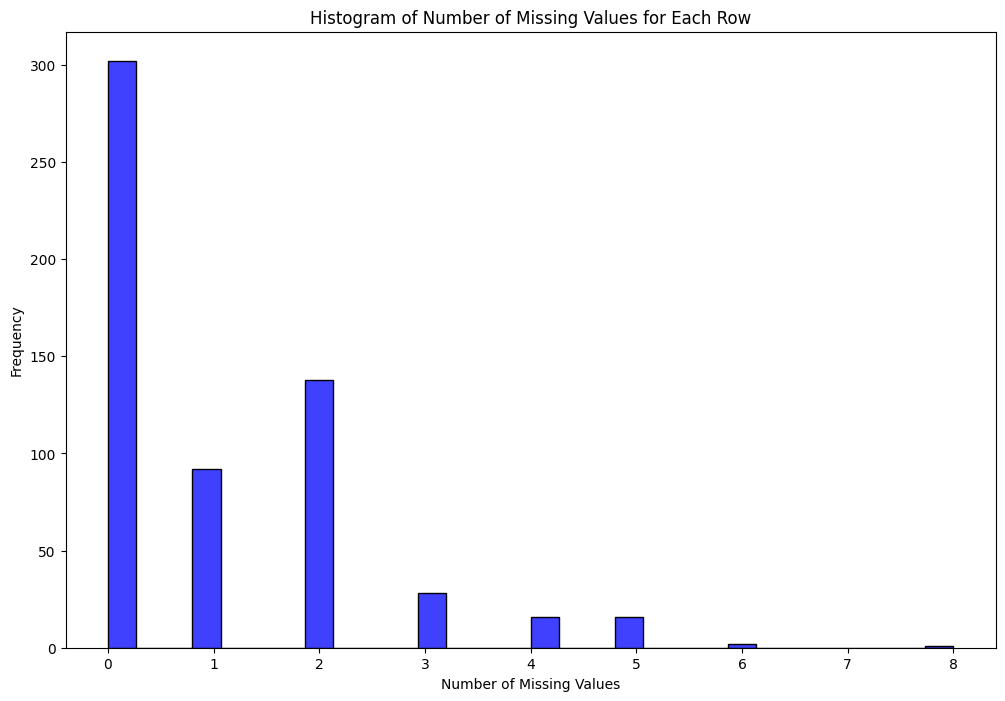

In [17]:
plt.figure(figsize=(12, 8))  # Creating a new figure with a specified size of 12 inches by 8 inches

# Creating a histogram using seaborn
sns.histplot(null_row_df['NaN_Count'], bins=30, kde=False, color='blue')  # Plotting a histogram of the 'NaN_Count' column with 30 bins, no kernel density estimate (kde), and blue color

# Adding a title to the plot
plt.title('Histogram of Number of Missing Values for Each Row')

# Labelling the x-axis
plt.xlabel('Number of Missing Values')

# Labelling the y-axis
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


In [18]:
#Impute missing values

# DEVELOPMENT STAGE: Filling with the most frequent value (mode)
df1['DEVELOPMENT STAGE'] = df1['DEVELOPMENT STAGE'].fillna(df1['DEVELOPMENT STAGE'].mode()[0])

# SITE COMMUNITY: Filling with the most frequent value (mode)
df1['SITE COMMUNITY'] = df1['SITE COMMUNITY'].fillna(df1['SITE COMMUNITY'].mode()[0])

# HOUSING TYPE: Filling with the most frequent value (mode)
df1['HOUSING TYPE'] = df1['HOUSING TYPE'].fillna(df1['HOUSING TYPE'].mode()[0])

# DEVELOPER: Filling with the most frequent value (mode)
df1['DEVELOPER'] = df1['DEVELOPER'].fillna(df1['DEVELOPER'].mode()[0])

# CONSTRUCTION TYPE: Filling with the most frequent value (mode)
df1['CONSTRUCTION TYPE'] = df1['CONSTRUCTION TYPE'].fillna(df1['CONSTRUCTION TYPE'].mode()[0])

# MANAGEMENT COMPANY: Filling with the most frequent value (mode)
df1['MANAGEMENT COMPANY'] = df1['MANAGEMENT COMPANY'].fillna(df1['MANAGEMENT COMPANY'].mode()[0])

# CONTACT PHONE: Filling with the most frequent value (mode)
df1['CONTACT PHONE'] = df1['CONTACT PHONE'].fillna(df1['CONTACT PHONE'].mode()[0])

# CONTRACT NUMBERS: Filling with the most frequent value (mode)
df1['CONTRACT NUMBERS'] = df1['CONTRACT NUMBERS'].fillna(df1['CONTRACT NUMBERS'].mode()[0])

# JOBS: Filling with the median
df1['JOBS'] = df1['JOBS'].fillna(df1['JOBS'].median())

# DATE FUNDED: Using forward fill
df1['DATE FUNDED'] = pd.to_datetime(df1['DATE FUNDED'], errors='coerce')
df1['DATE FUNDED'] = df1['DATE FUNDED'].ffill

# IN-SERVICE DATE: Using backward fill
df1['IN-SERVICE DATE'] = pd.to_datetime(df1['IN-SERVICE DATE'], errors='coerce')
df1['IN-SERVICE DATE'] = df1['IN-SERVICE DATE'].bfill

# Verifying that the imputation is done
missing_values_after = df1.isnull().sum()
print(missing_values_after)

# Saving the cleaned dataframe to a new CSV file
cleaned_file_path = '/content/sample_data/LAHD_Affordable_Housing_Projects_List_Cleaned.csv'
df1.to_csv(cleaned_file_path, index=False)
print(f'Cleaned data saved to {cleaned_file_path}')

APN                        0
PROJECT NUMBER             0
NAME                       0
DEVELOPMENT STAGE          0
CONSTRUCTION TYPE          0
SITE ADDRESS               0
SITE  COUNCIL DISTRICT     0
SITE #                     0
SITE COMMUNITY             0
SITE UNITS                 0
PROJECT TOTAL UNITS        0
HOUSING TYPE               0
SUPPORTIVE HOUSING         0
SH UNITS PER SITE          0
DATE FUNDED                0
LAHD FUNDED                0
LEVERAGE                   0
TAX EXEMPT CONDUIT BOND    0
TDC                        0
IN-SERVICE DATE            0
DEVELOPER                  0
MANAGEMENT COMPANY         0
CONTACT PHONE              0
PHOTO                      0
JOBS                       0
PROJECT SUMMARY URL        0
CONTRACT NUMBERS           0
DATE STAMP                 0
SITE LONGITUDE             0
SITE LATITUDE              0
GPS_COORDS ON MAP          0
ZIP                        0
dtype: int64
Cleaned data saved to /content/sample_data/LAHD_Affordable_

#### Observations :

* From the above results, it is clear that
there are no more null entries left




In [19]:
# Printing the number of unique values in each column.

# Applying lambda function to get count of unique entires in each column.
print(df1.apply(lambda col: len(col.unique())))

APN                        584
PROJECT NUMBER             447
NAME                       595
DEVELOPMENT STAGE            2
CONSTRUCTION TYPE            7
SITE ADDRESS               591
SITE  COUNCIL DISTRICT      15
SITE #                      20
SITE COMMUNITY              87
SITE UNITS                 144
PROJECT TOTAL UNITS        132
HOUSING TYPE                 6
SUPPORTIVE HOUSING           2
SH UNITS PER SITE           91
DATE FUNDED                  1
LAHD FUNDED                350
LEVERAGE                   396
TAX EXEMPT CONDUIT BOND    126
TDC                        440
IN-SERVICE DATE              1
DEVELOPER                  226
MANAGEMENT COMPANY         146
CONTACT PHONE              182
PHOTO                      312
JOBS                       242
PROJECT SUMMARY URL        595
CONTRACT NUMBERS           378
DATE STAMP                   1
SITE LONGITUDE             549
SITE LATITUDE              565
GPS_COORDS ON MAP          582
ZIP                         78
dtype: i

#### Observations:

*   Since 'DATE STAMP' has only one unique value, it will be removed from the analysis

*  The columns can be separated into discrete and continuous based on the no of unique values they have



In [20]:
# Dropping the columns with only one unique value

# Keeping only those columns in df1 that have more than one unique value, effectively removing columns with a single unique value
df1 = df1.loc[:, df1.nunique() > 1]

# List of continuous and categorical columns
continuous_columns = ['SITE UNITS', 'PROJECT TOTAL UNITS', 'LAHD FUNDED', 'LEVERAGE', 'TDC', 'JOBS']
categorical_columns = ['DEVELOPMENT STAGE', 'CONSTRUCTION TYPE', 'HOUSING TYPE', 'SUPPORTIVE HOUSING', 'SITE COMMUNITY']

# Verifying that the columns exist in the DataFrame
continuous_columns = [col for col in continuous_columns if col in df1.columns]
categorical_columns = [col for col in categorical_columns if col in df1.columns]

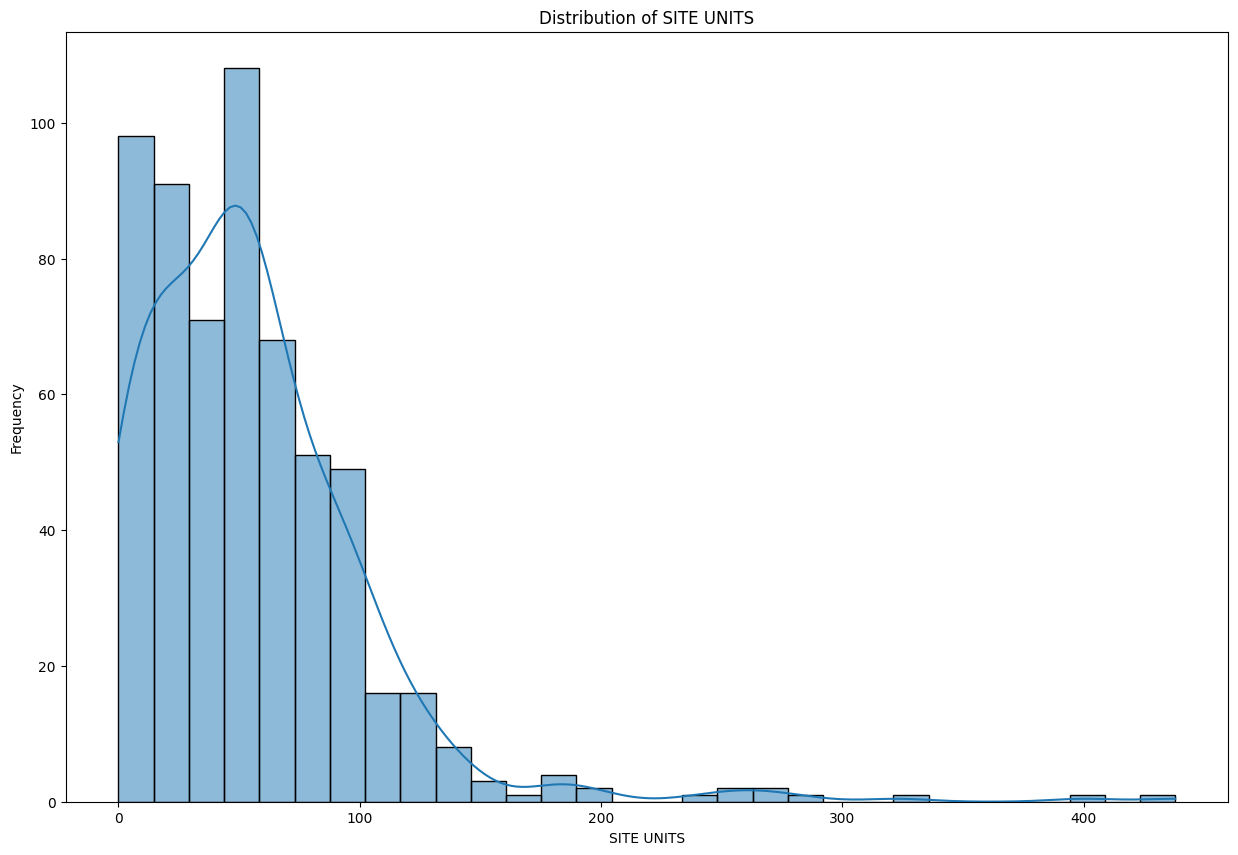

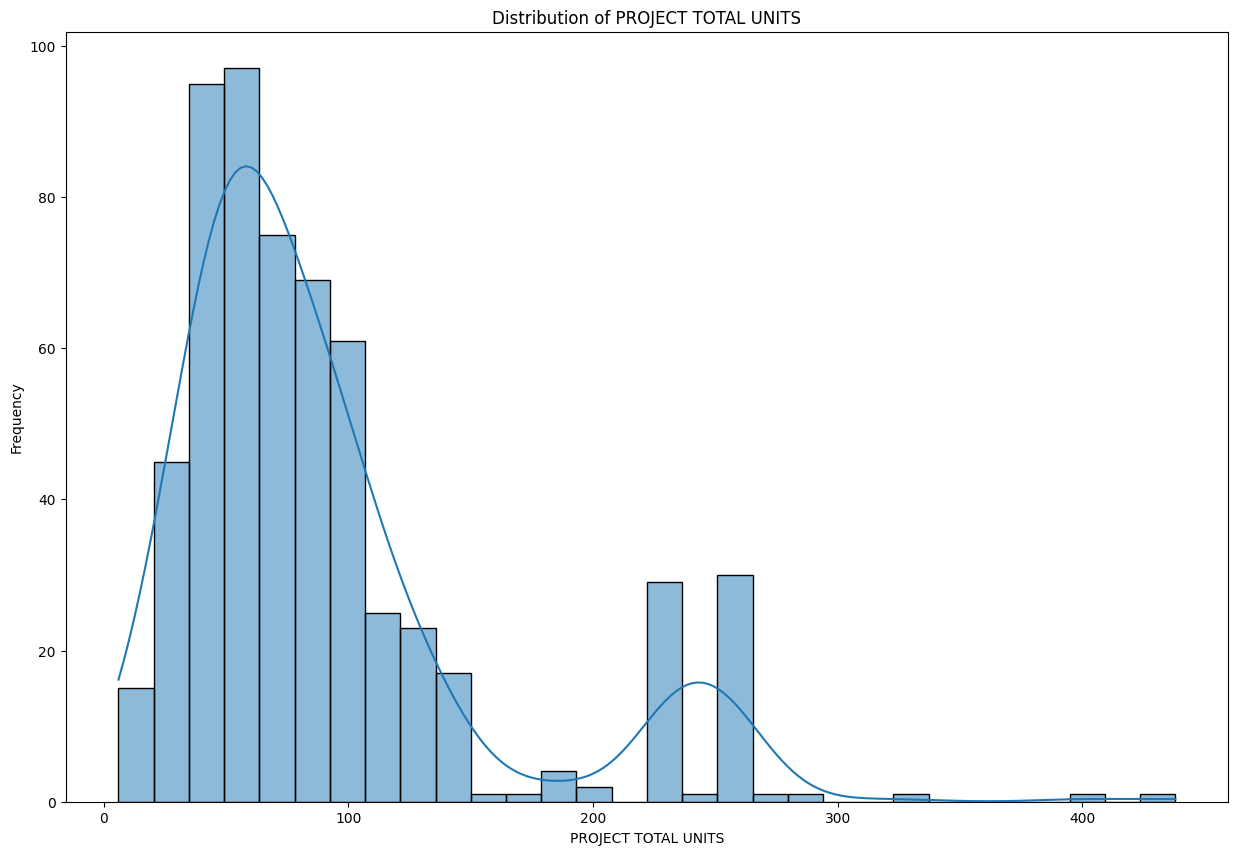

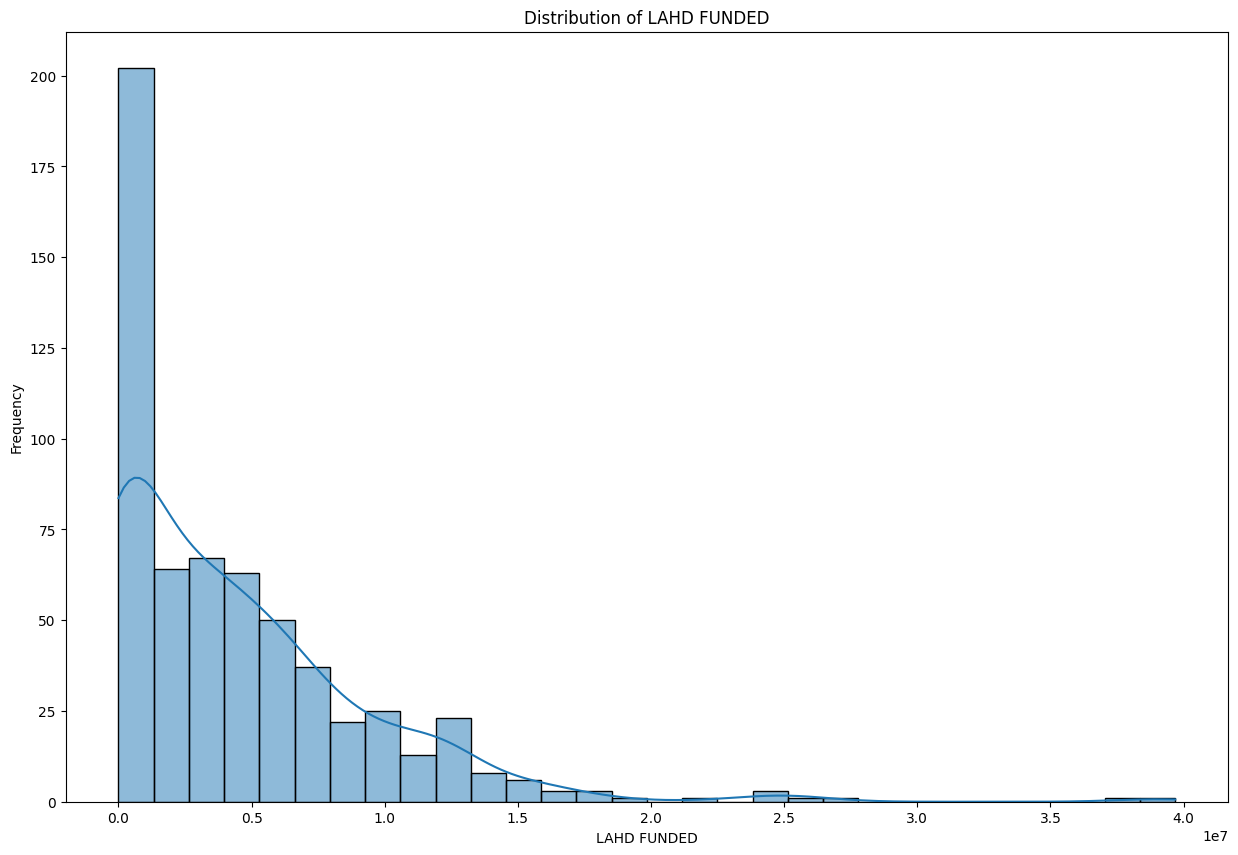

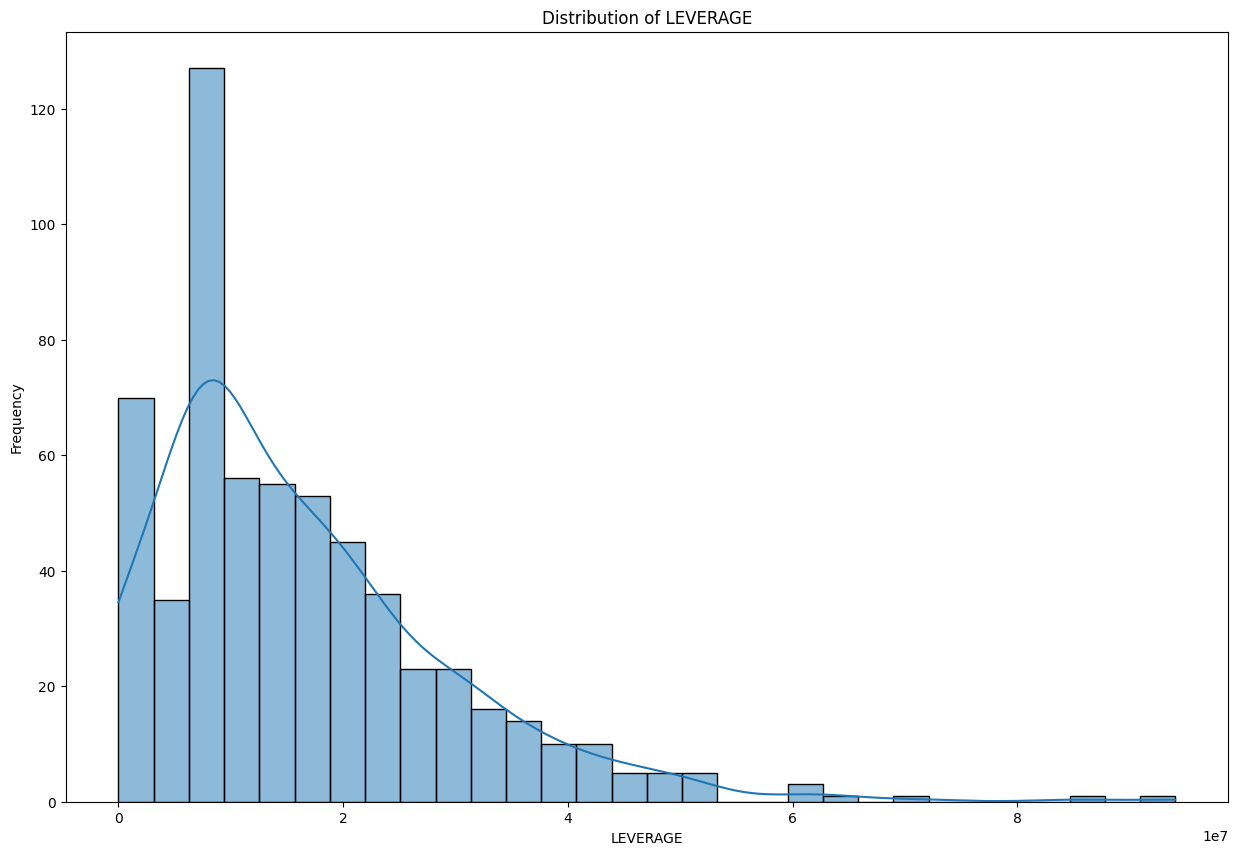

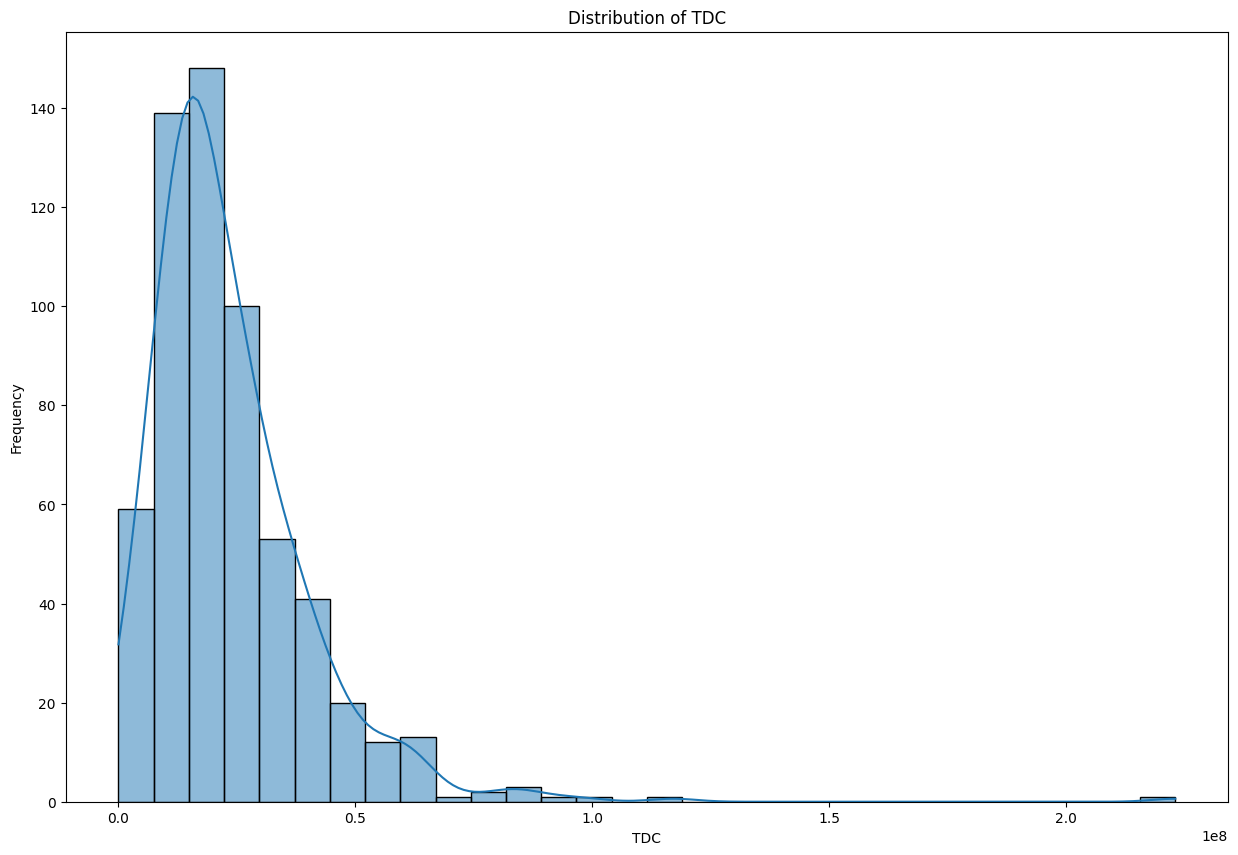

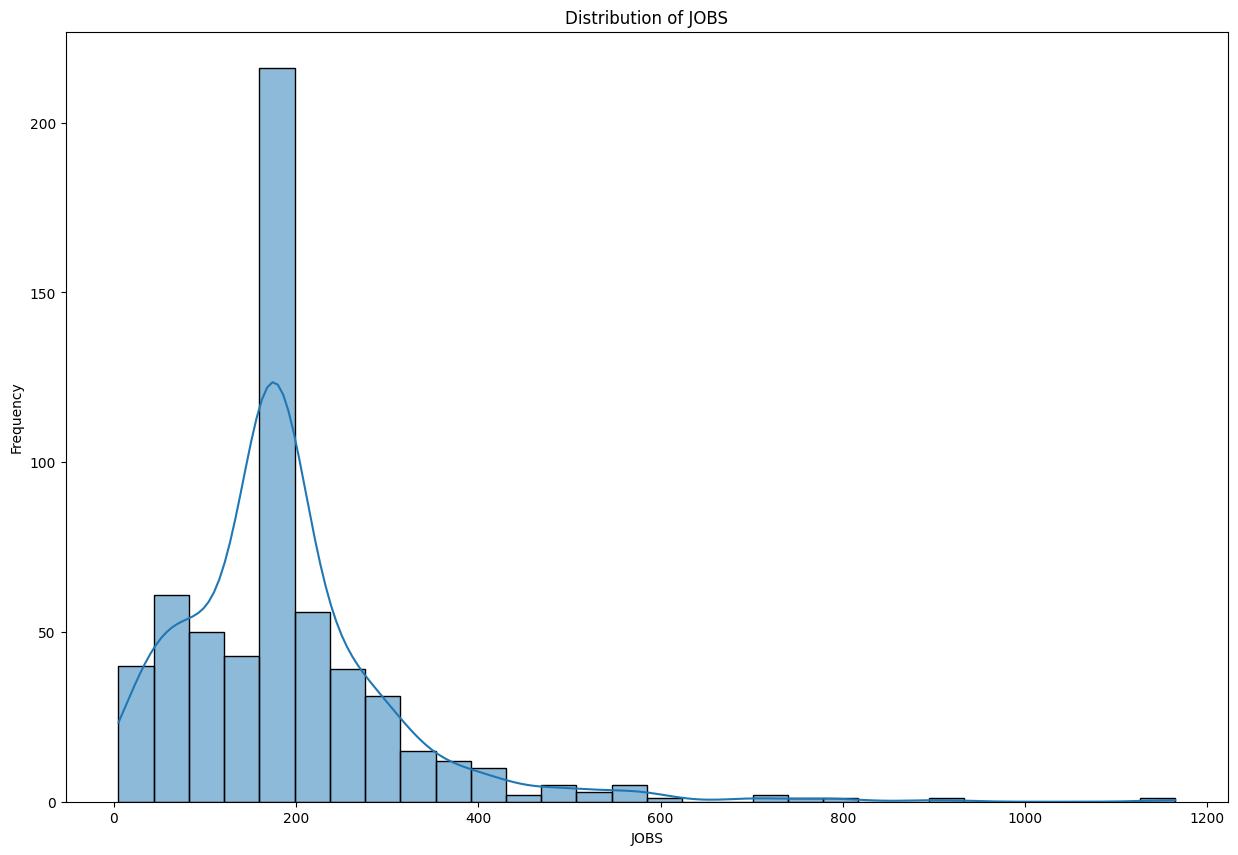

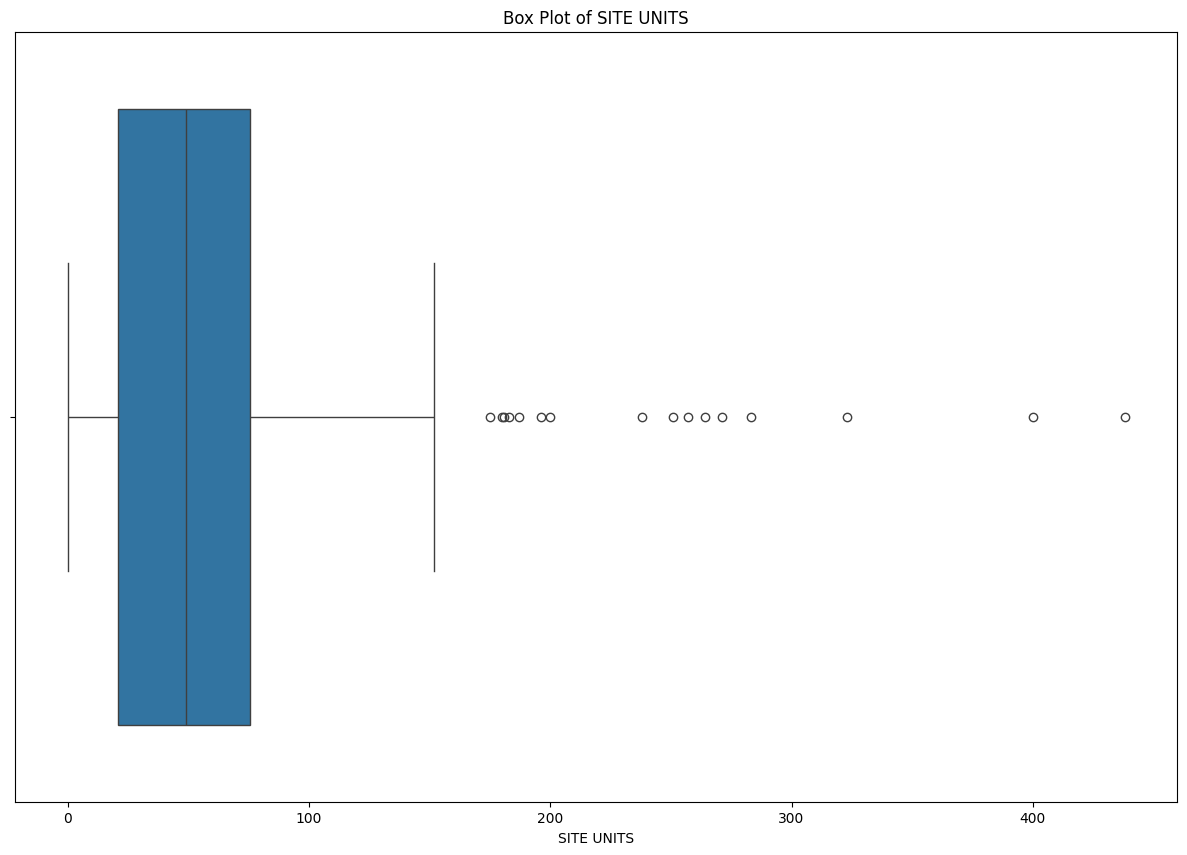

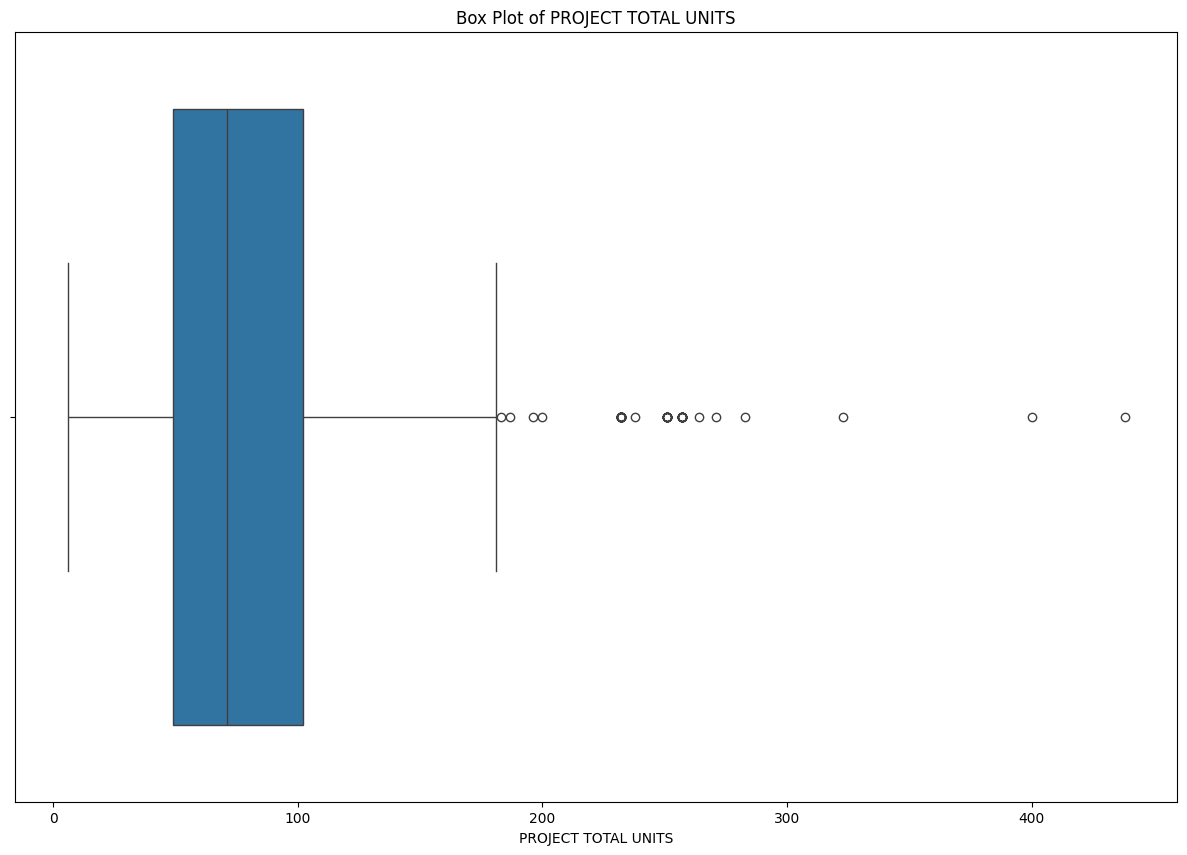

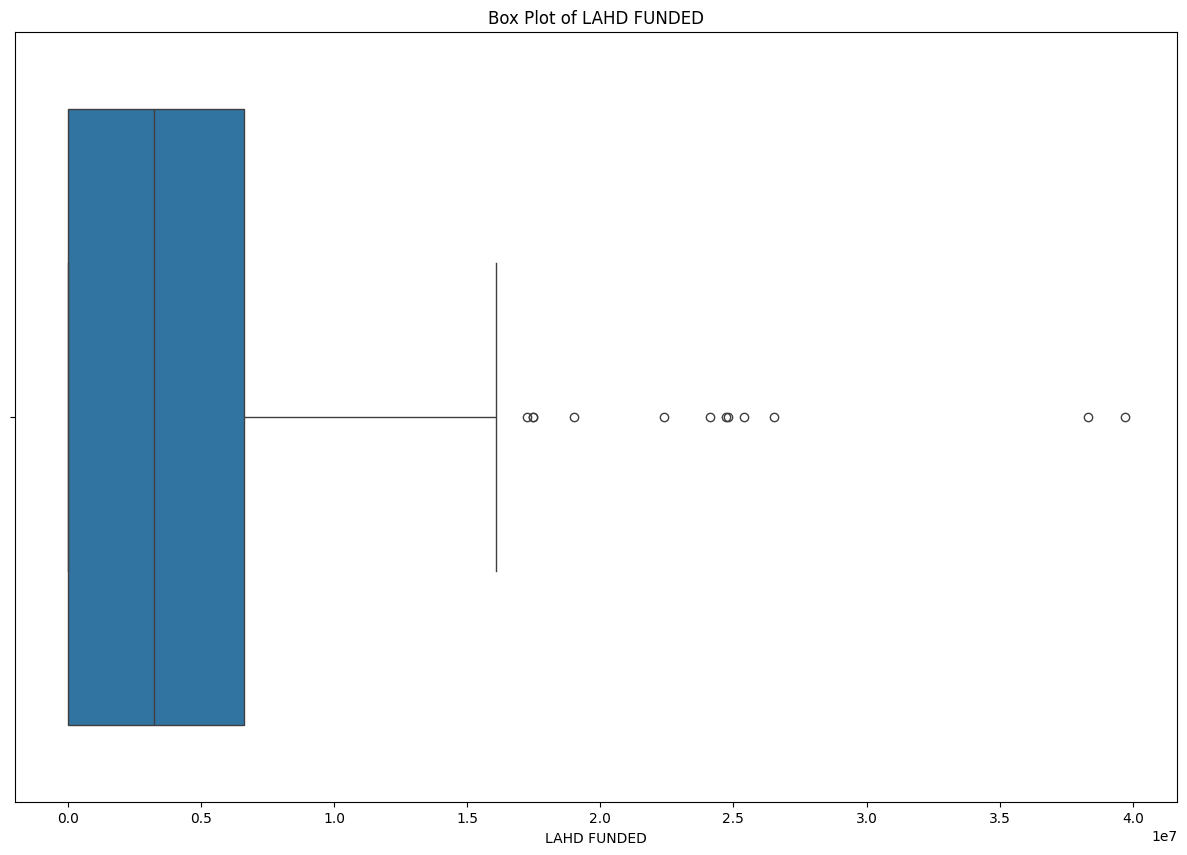

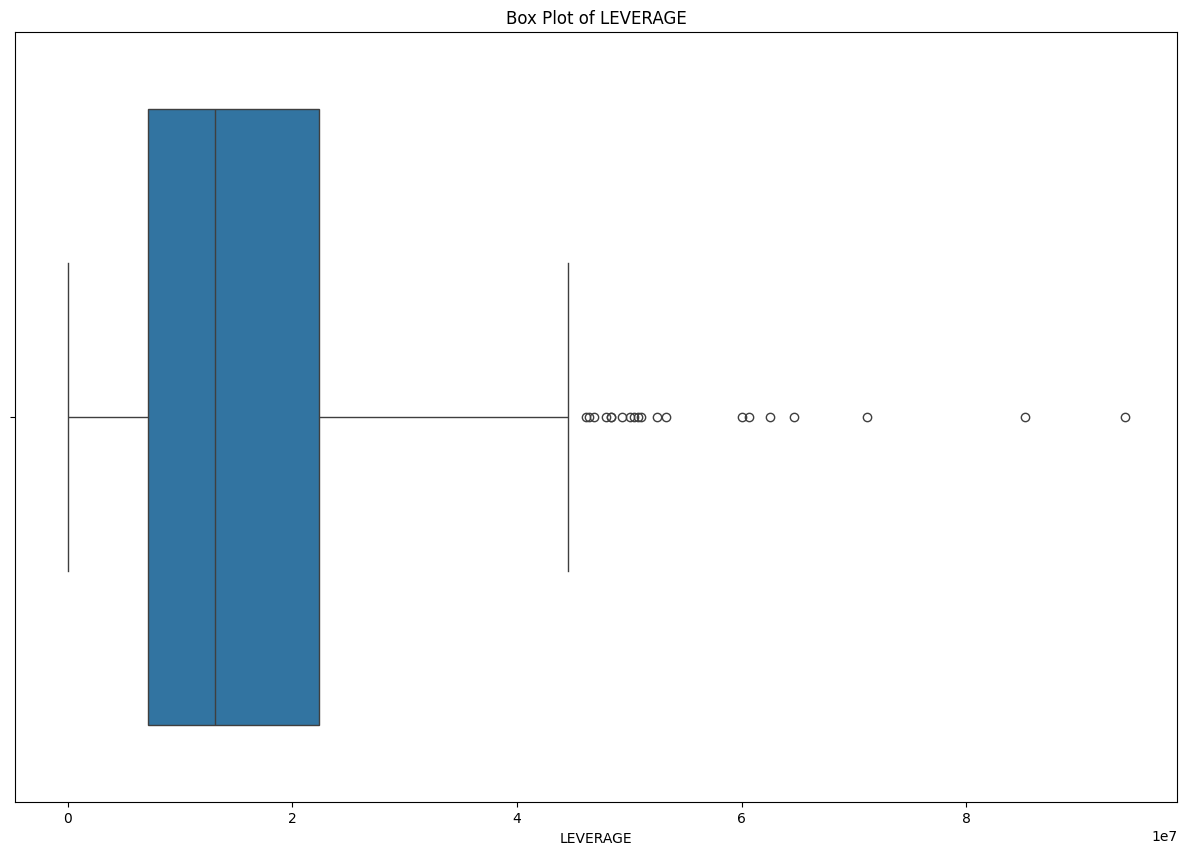

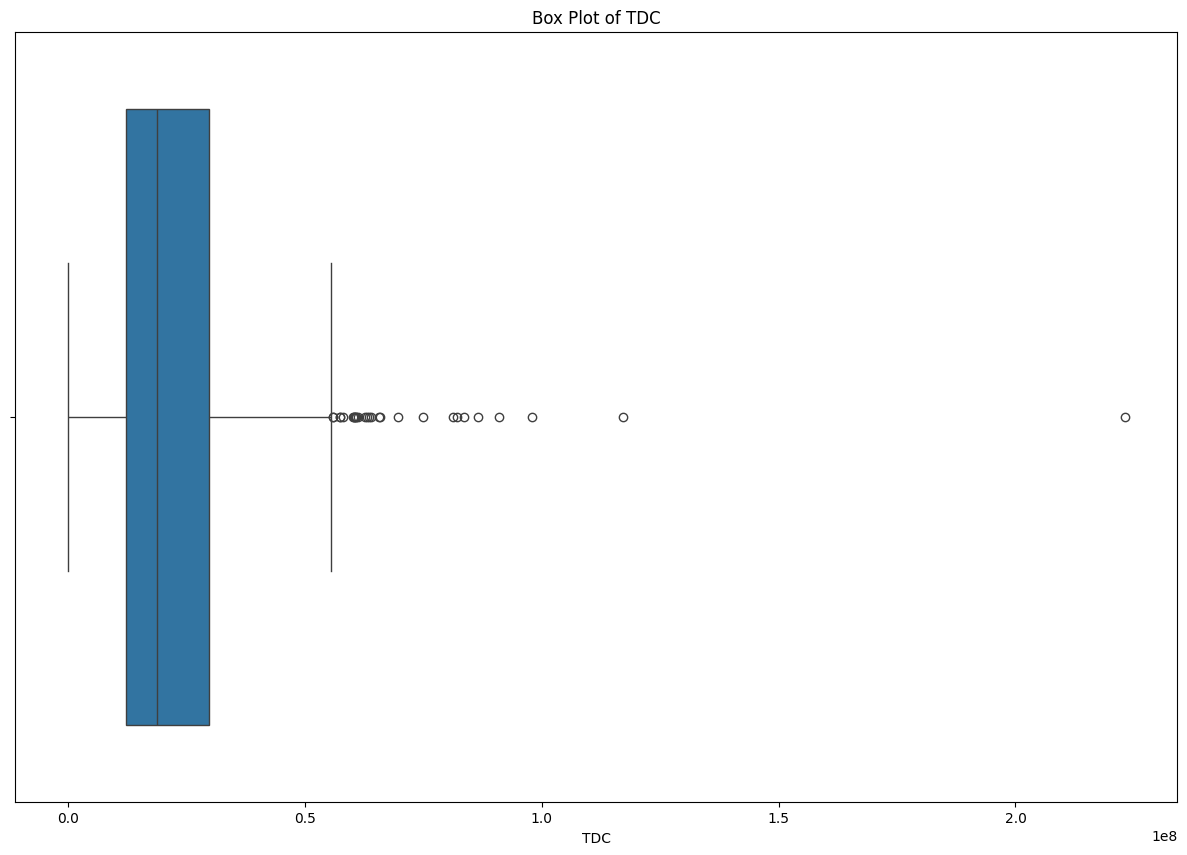

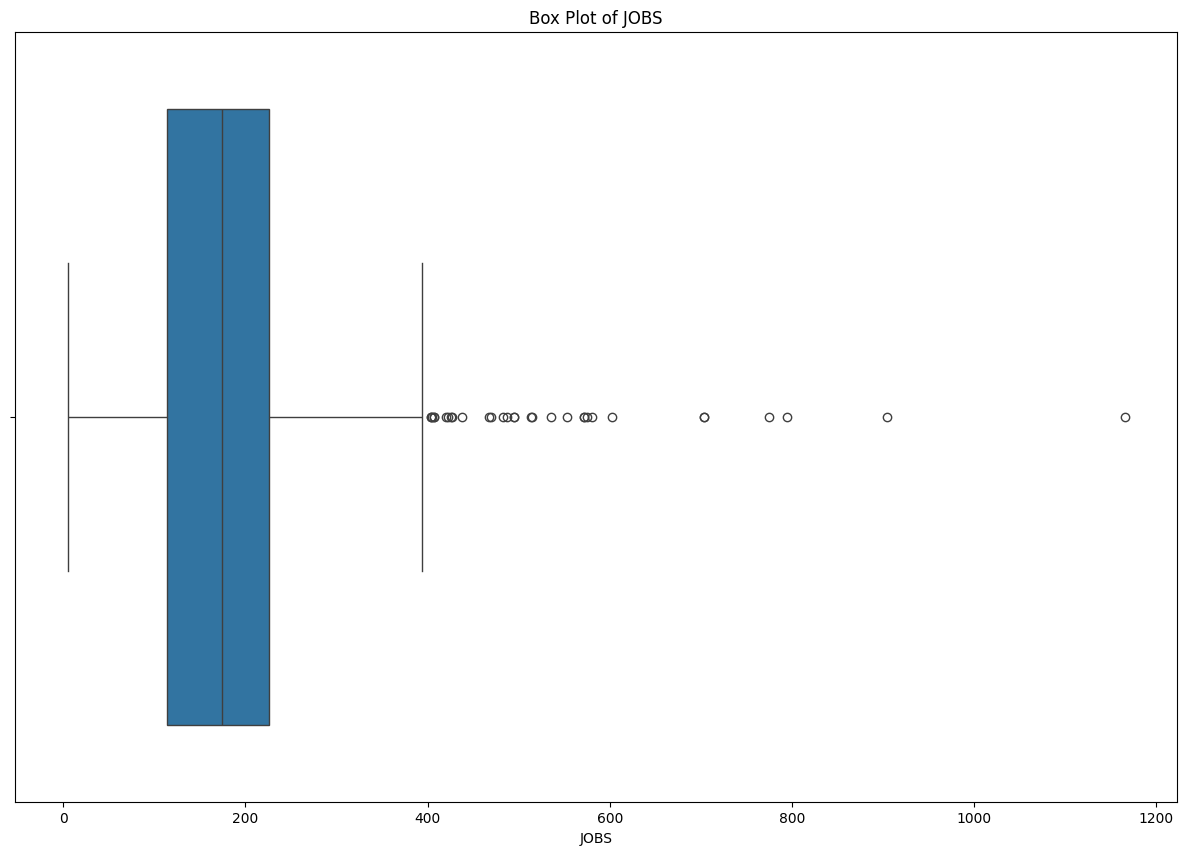

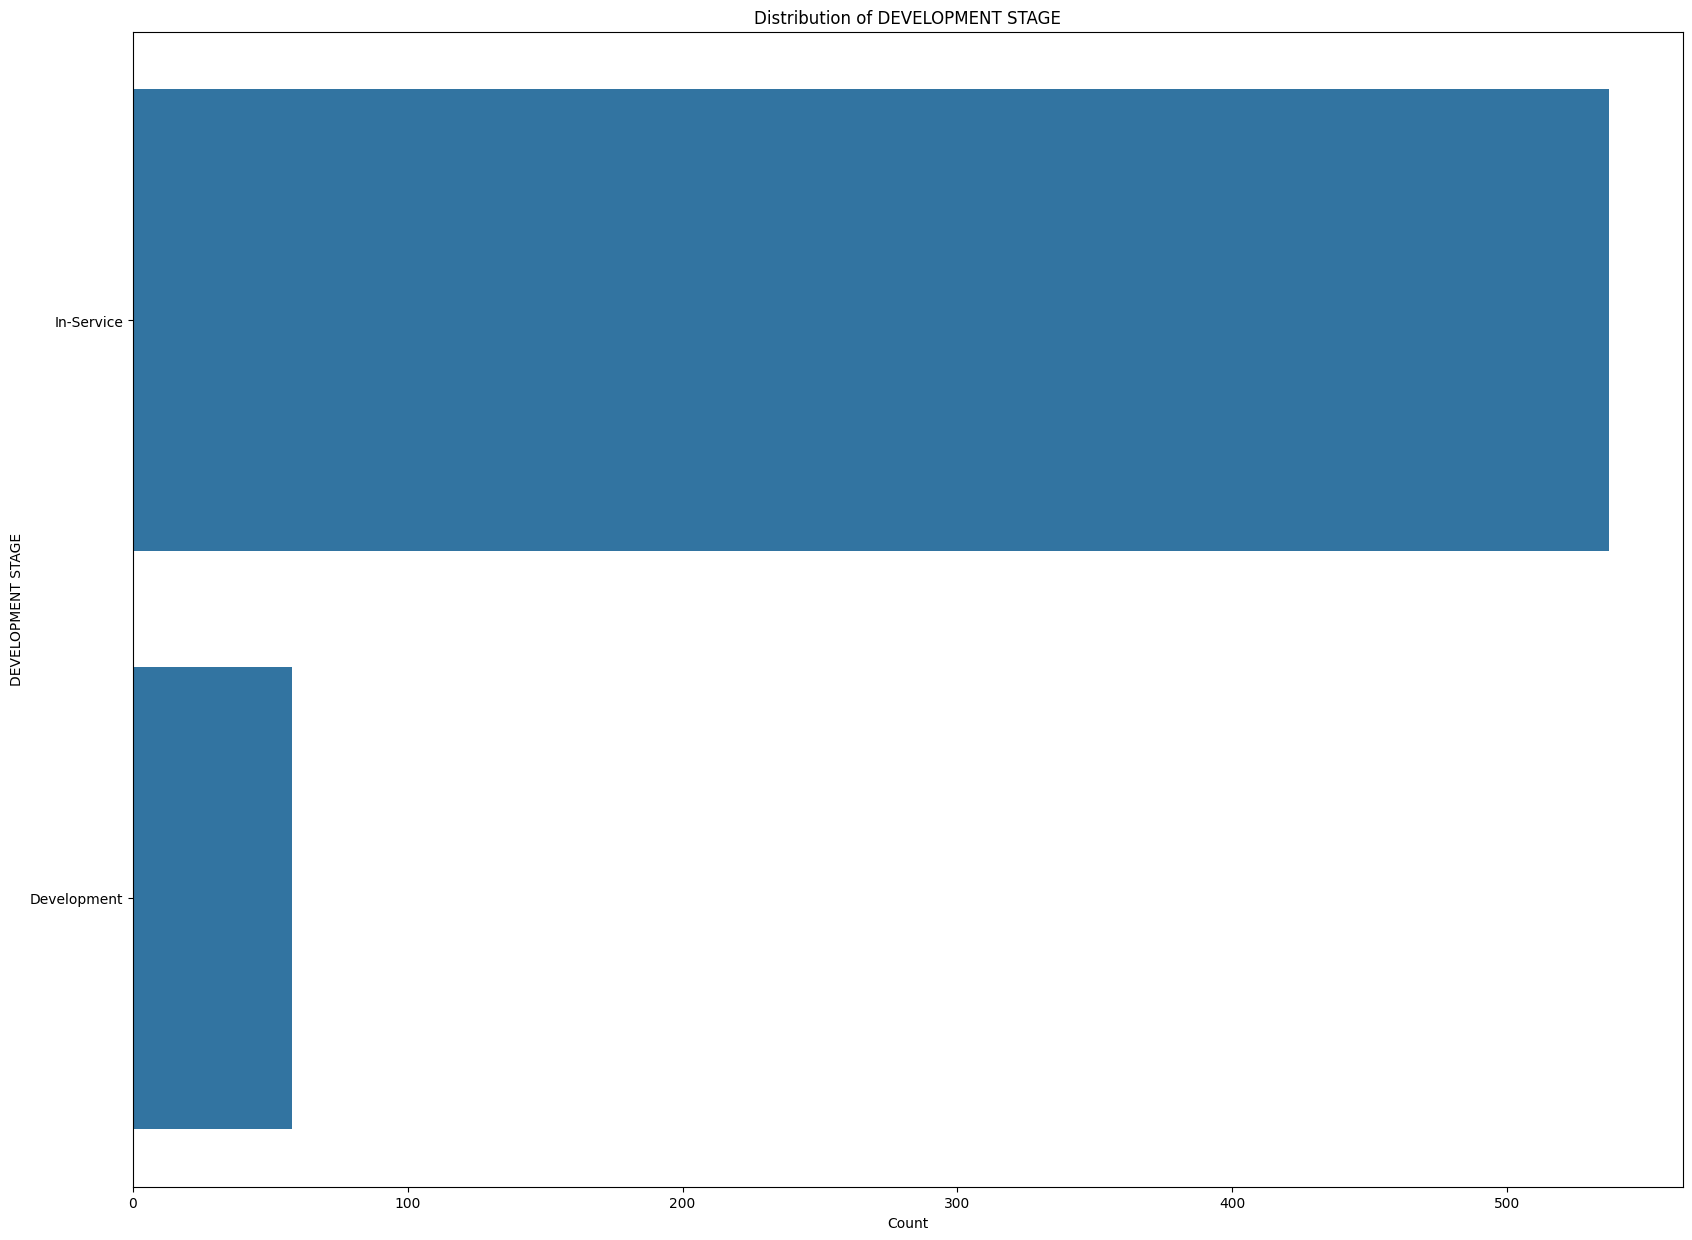

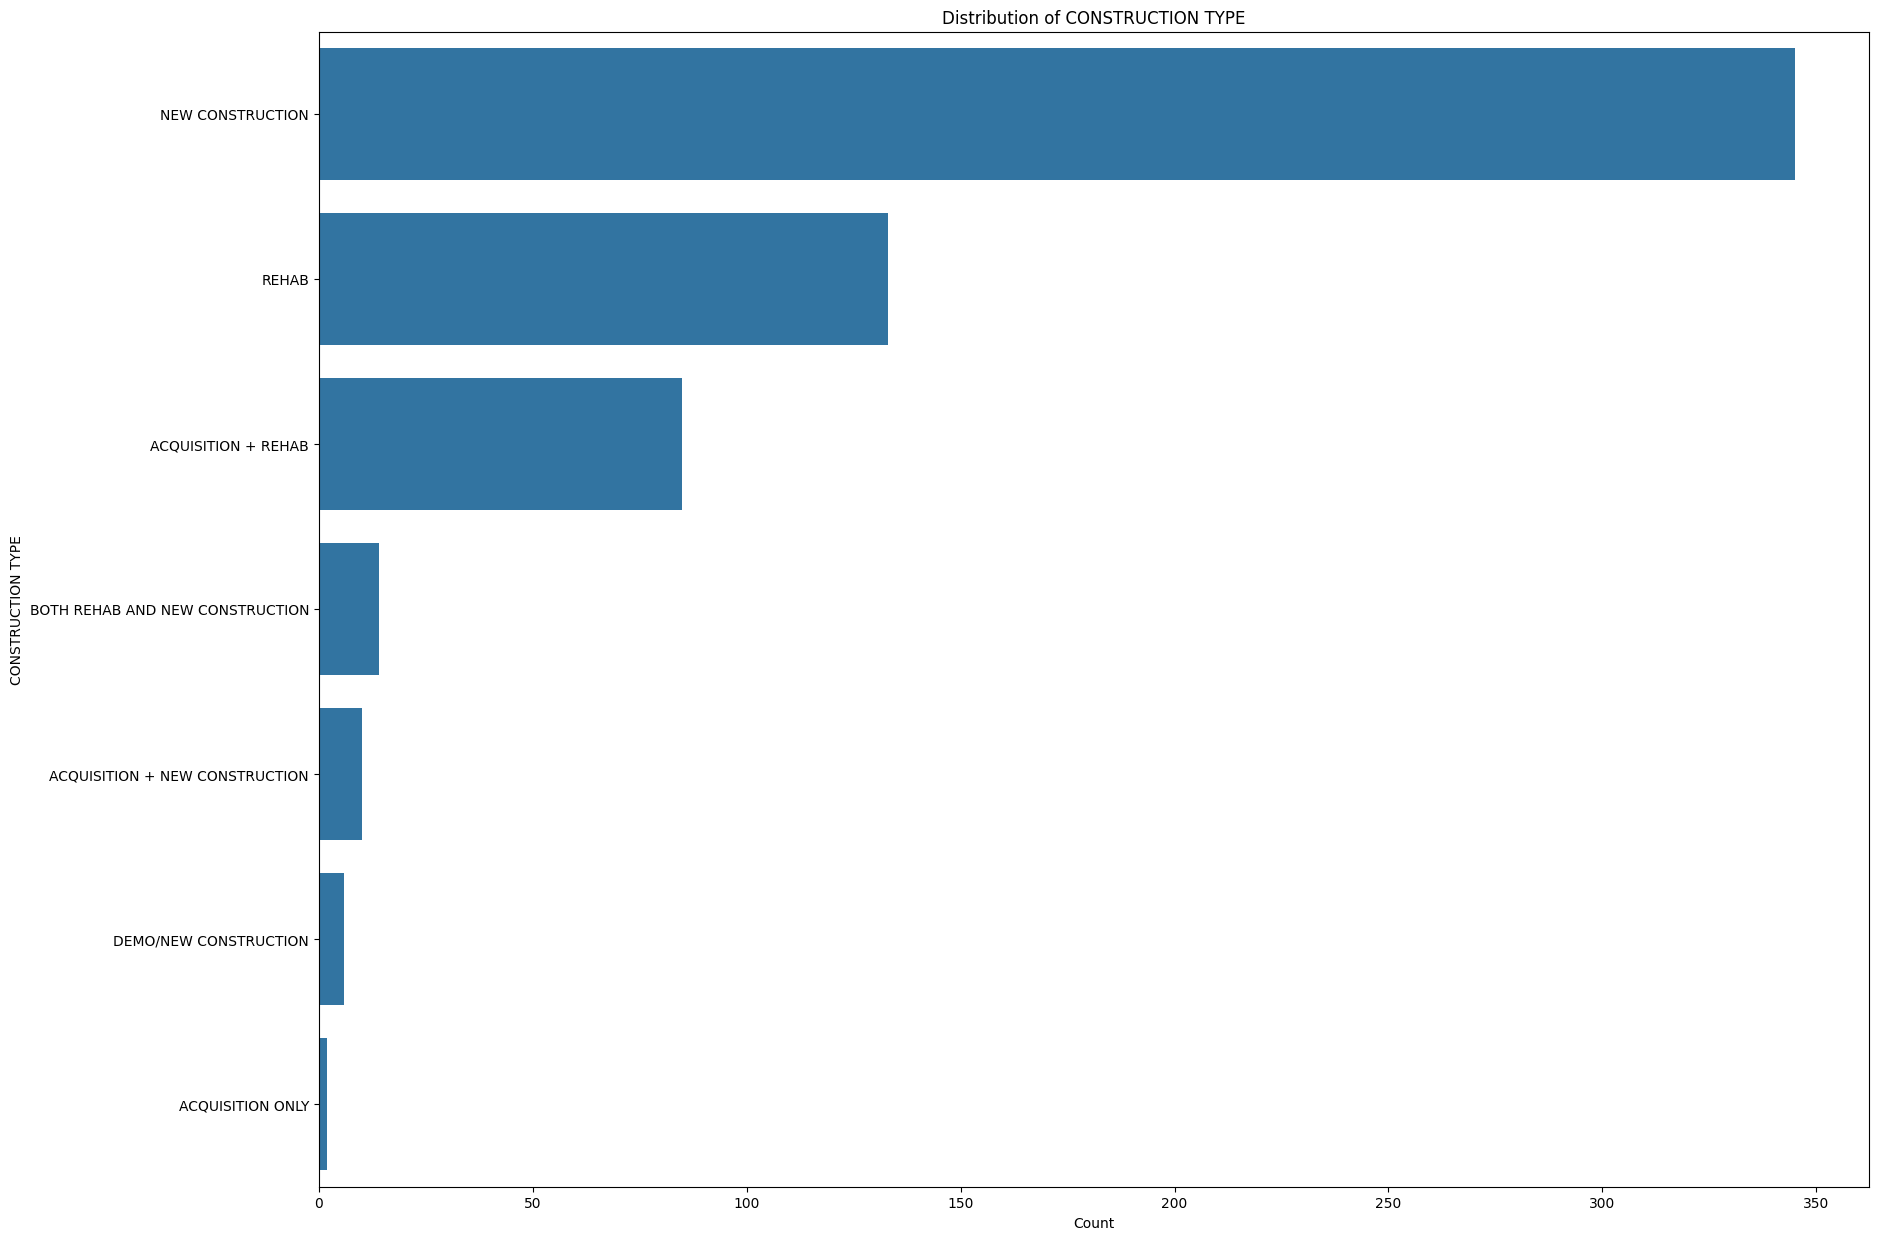

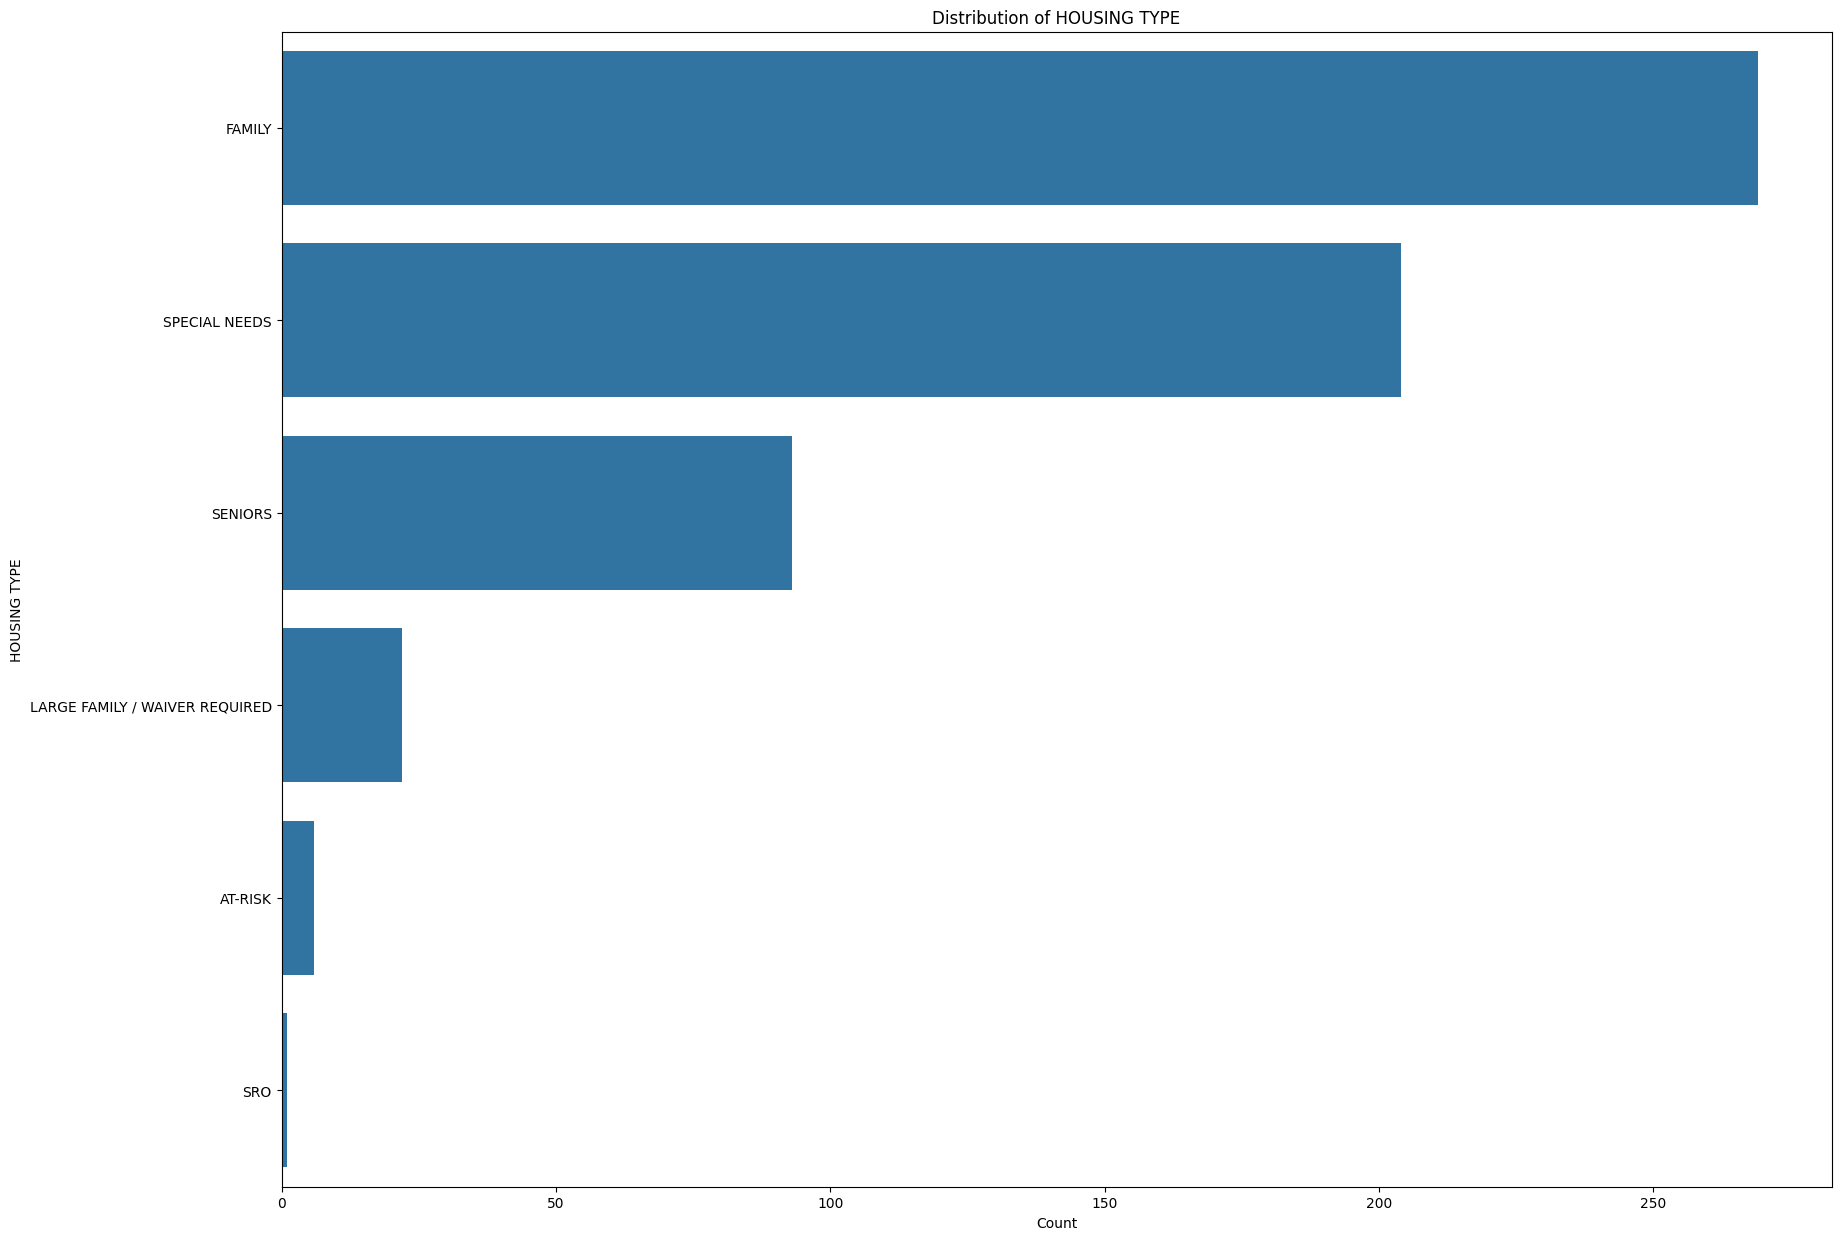

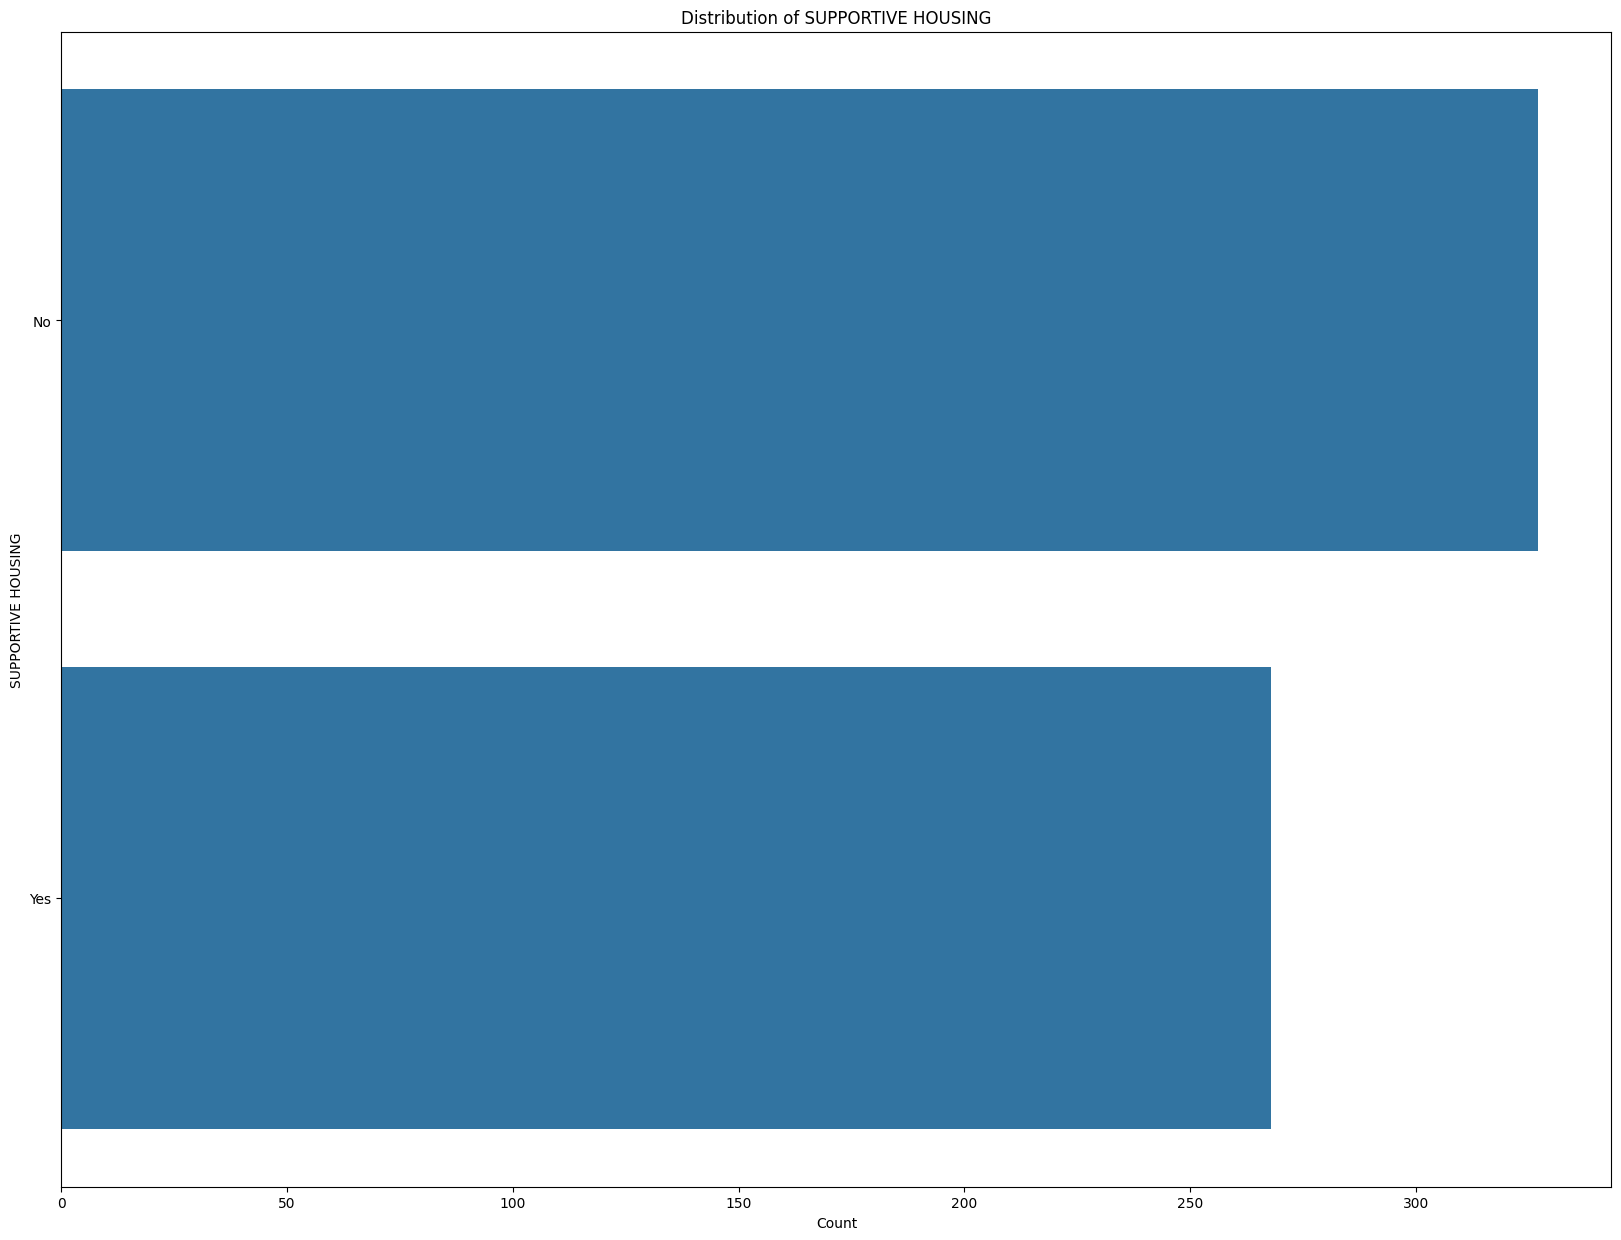

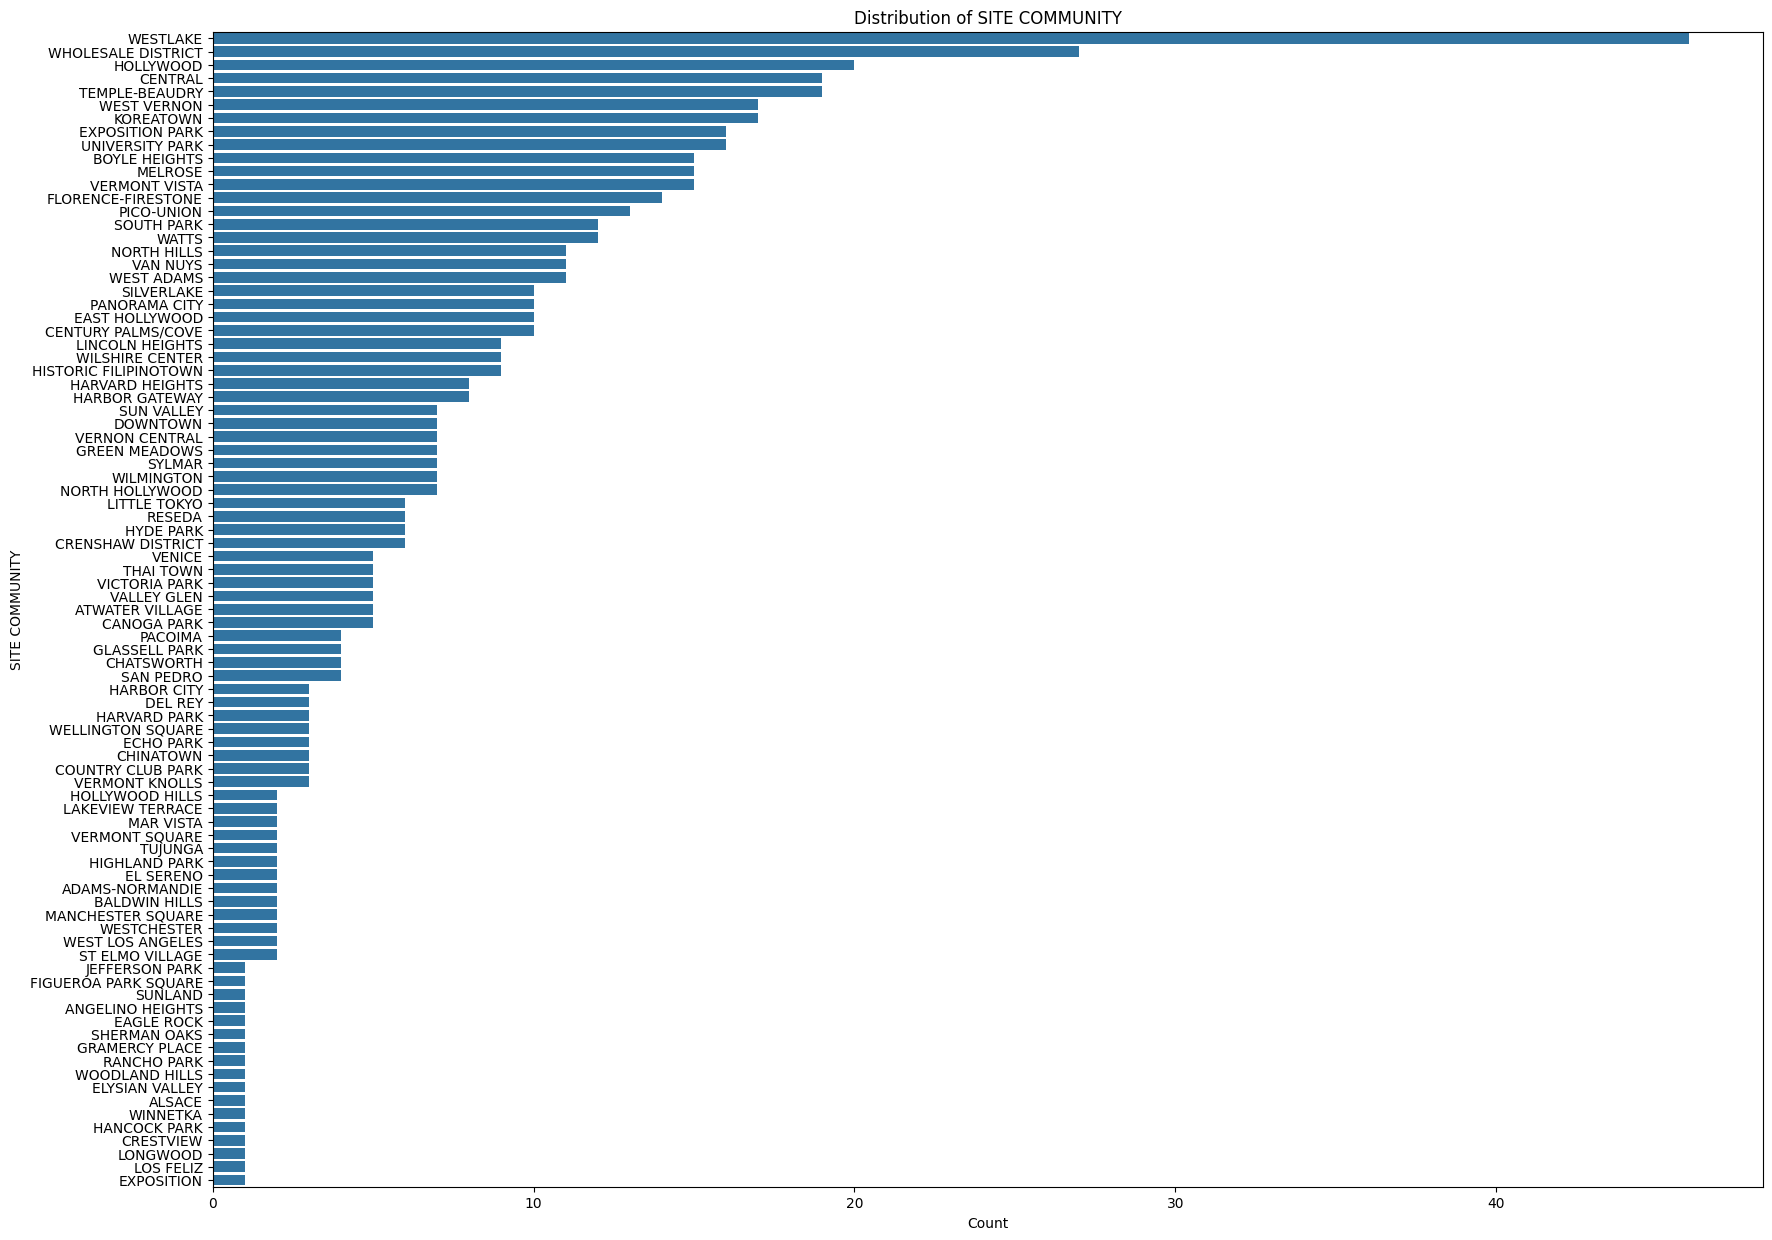

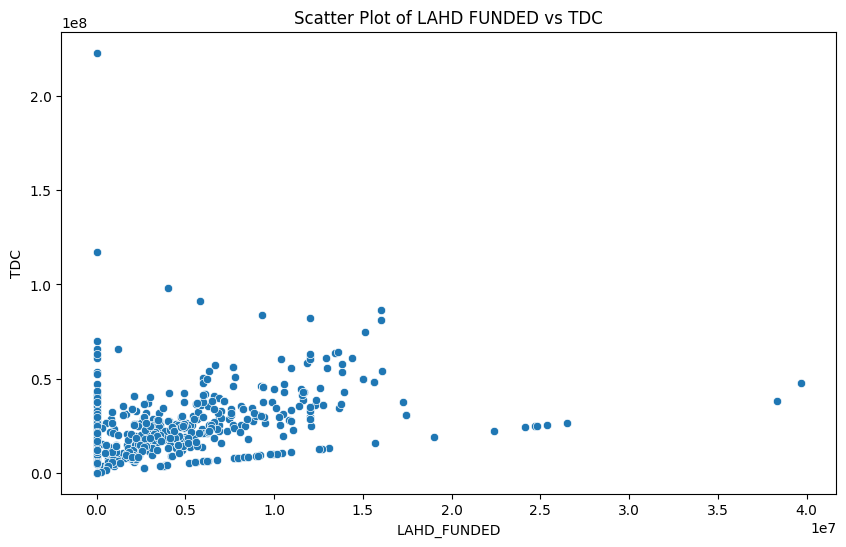

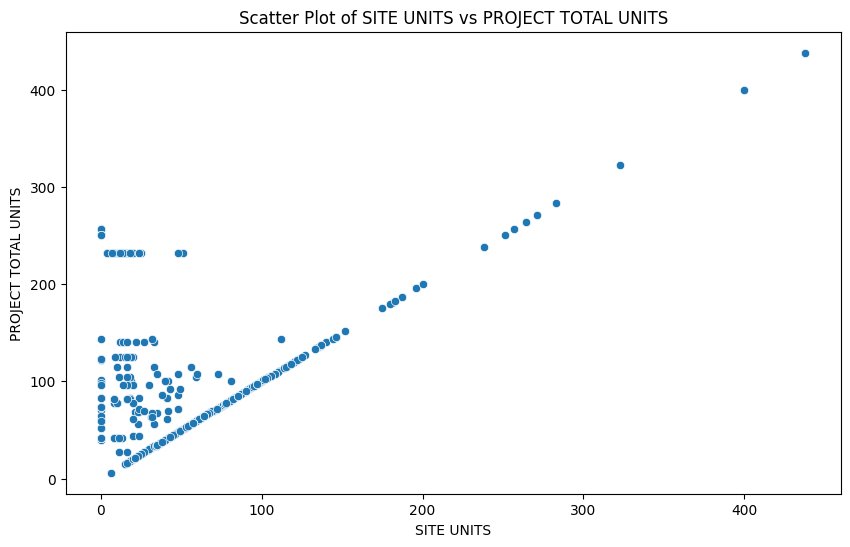

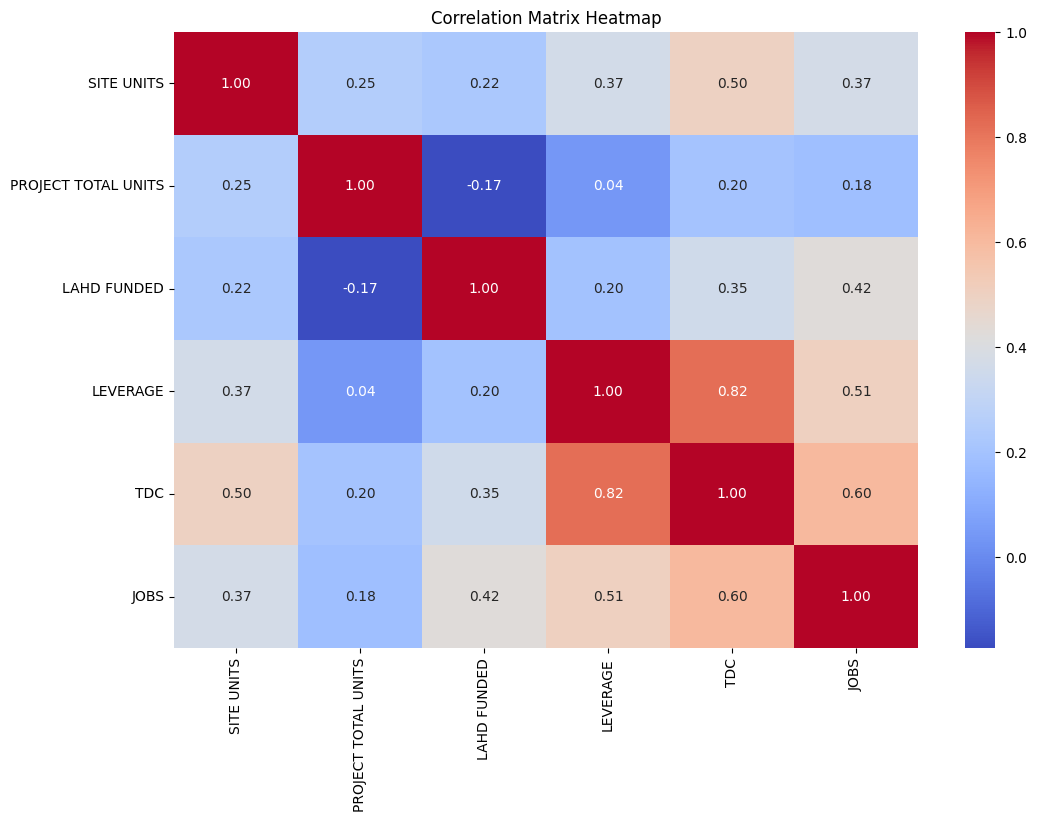

In [21]:
# Histograms for continuous variables

for col in continuous_columns:
    plt.figure(figsize=(15, 10))
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    # Purpose: To visualize the distribution of continuous variables and identify patterns, skewness, and outliers.

# Box plots for continuous variables
for col in continuous_columns:
    plt.figure(figsize=(15, 10))
    sns.boxplot(x=df1[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()
    # Purpose: To detect outliers and understand the spread of continuous variables, including the median and interquartile range.

# Bar plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(20, 15))
    sns.countplot(y=df1[col], order=df1[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()
    # Purpose: To display the frequency distribution of categorical variables and understand the most common categories.

# Scatter plots for relationships between continuous variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x= 'LAHD FUNDED', y='TDC', data=df1)
plt.title('Scatter Plot of LAHD FUNDED vs TDC')
plt.xlabel('LAHD_FUNDED')
plt.ylabel('TDC')
plt.show()
# Purpose: To explore the relationship between the amount of LAHD funding and the total development cost (TDC).

plt.figure(figsize=(10, 6))
sns.scatterplot(x='SITE UNITS', y='PROJECT TOTAL UNITS', data=df1)
plt.title('Scatter Plot of SITE UNITS vs PROJECT TOTAL UNITS')
plt.xlabel('SITE UNITS')
plt.ylabel('PROJECT TOTAL UNITS')
plt.show()
# Purpose: To examine the relationship between the number of site units and the total number of project units.

# Heatmap of correlations
plt.figure(figsize=(12, 8))
corr_matrix = df1[continuous_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
# Purpose: To visualize the correlations between continuous variables, helping to identify any strong relationships.

### Observations:

*  Most continuous variables, such as LAHD FUNDED, TDC, and LEVERAGE, exhibit skewed distributions with a majority of projects having lower values and a few with very high values

* LAHD FUNDED is right-skewed, indicating that most projects received smaller funding amounts, with a few projects receiving significantly higher funding

*  Box plots reveal several outliers in continuous
variables like TDC and LAHD FUNDED, indicating that some projects are outliers in terms of their funding and development costs.


*  The DEVELOPMENT STAGE bar plot shows that most projects are in 'IN-SERVICE' stage



*  The CONSTRUCTION TYPE distribution highlights the predominance of certain construction types over others, such as New Construction being more common

*  The scatter plot of LAHD FUNDED vs. TDC shows a positive correlation, suggesting that higher LAHD funding is generally associated with higher total development costs.

*  The scatter plot of SITE_UNITS vs. PROJECT TOTAL UNITS also indicates a positive correlation, implying that larger sites are part of larger overall projects

*  From the correation matrix,we can see that there is a strong relation between TDC(Total Development Cost) and Leverage (use of borrowed funds to increase the potential return on investment).It is because higher TDC may require more significant financing, impacting the leverage ratio and overall investment strategy.







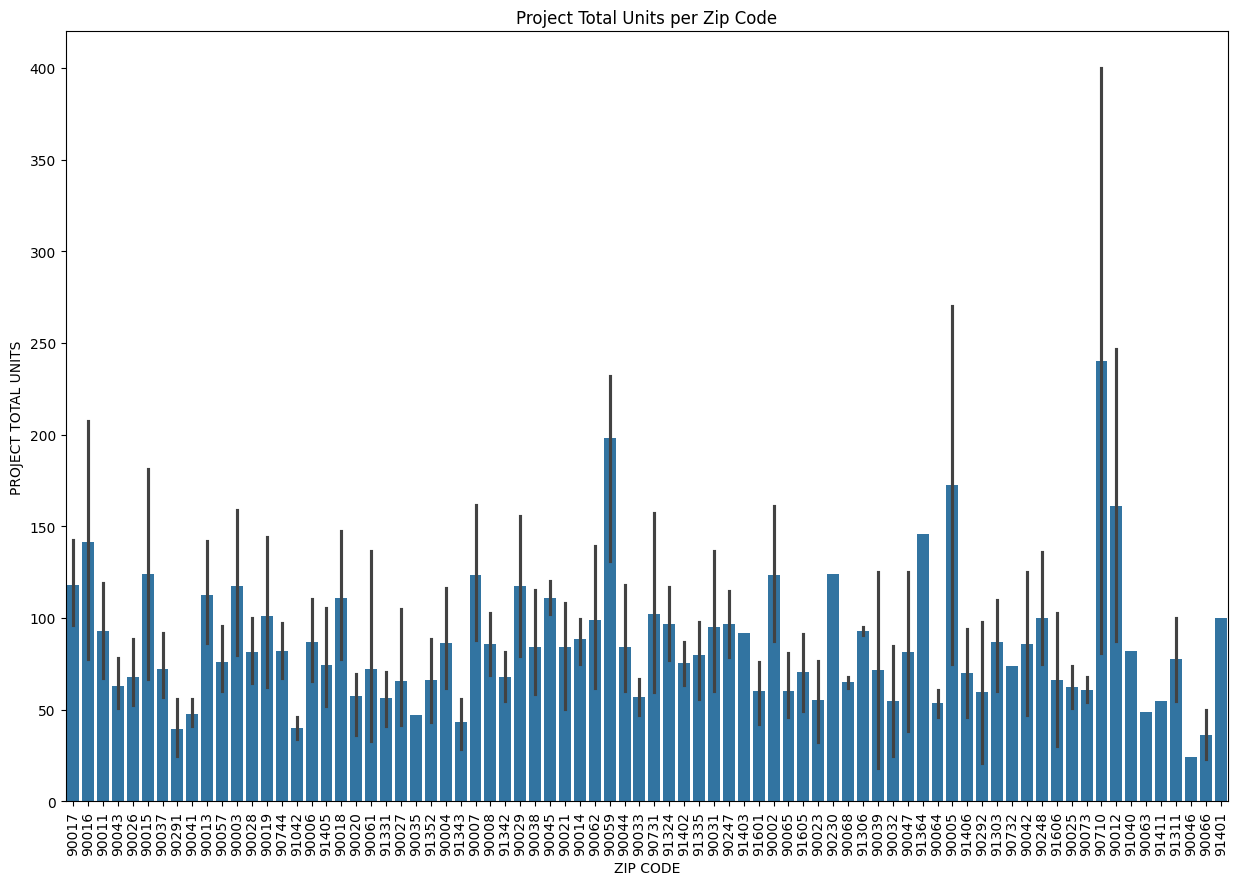

In [22]:
# printing 'ZIP code' vs PROJECT TOTAL UNITS'

# Setting the figure size for the plot
plt.figure(figsize=(15,10))
# Creating a bar plot with ZIP codes on the x-axis and project total units on the y-axis
sns.barplot(x='ZIP', y='PROJECT TOTAL UNITS', data=df1)
# Labelling the x-axis as 'ZIP CODE'
plt.xlabel('ZIP CODE')
# Labelling the y-axis as 'PROJECT TOTAL UNITS'
plt.ylabel('PROJECT TOTAL UNITS')
# Setting the title of the plot
plt.title('Project Total Units per Zip Code')
# Rotating the x-axis labels by 90 degrees for better readability if the labels are long
plt.xticks(rotation=90)
# Displaying the plot
plt.show()

# Exploring the Health data

In [23]:
df2 = pd.read_csv('Restaurant_and_Market_Health_Inspections.csv')   # reading the csv file into a pandas dataframe
df2.head()   # printing first five rows of the dataframe

serial_number           activity_date        facility_name  score grade  \
0     DAJ00E07B  12/29/2017 12:00:00 AM  HABITAT COFFEE SHOP     95     A   
1     DAQOKRFZB  12/29/2017 12:00:00 AM             REILLY'S     92     A   
2     DASJI4LUR  12/29/2017 12:00:00 AM       STREET CHURROS     93     A   
3     DA40LU5AT  12/29/2017 12:00:00 AM    TRINITI ECHO PARK     94     A   
4     DAXV2RMYC  12/29/2017 12:00:00 AM               POLLEN     94     A   

   service_code service_description employee_id           facility_address  \
0             1  ROUTINE INSPECTION   EE0000923     3708 N EAGLE ROCK BLVD   
1             1  ROUTINE INSPECTION   EE0000633        100 WORLD WAY # 120   
2             1  ROUTINE INSPECTION   EE0000835  6801 HOLLYWOOD BLVD # 253   
3             1  ROUTINE INSPECTION   EE0000923         1814 W SUNSET BLVD   
4             1  ROUTINE INSPECTION   EE0000923         2100 ECHO PARK AVE   

  facility_city facility_id facility_state facility_zip   owner_id  \
0   LOS ANGELES   FA0170465             CA        90065  OW0178123   
1   LOS ANGELES   FA0244690             CA        90045  OW0208441   
2   LOS ANGELES   FA0224109             CA        90028  OW0228670   
3   LOS ANGELES   FA0252528             CA   90026-3227  OW0246287   
4   LOS ANGELES   FA0252789             CA        90026  OW0246479   

                  owner_name                         pe_description  \
0   GLASSELL COFFEE SHOP LLC  RESTAURANT (0-30) SEATS MODERATE RISK   
1  AREAS SKYVIEW LAX JV, LLC  RESTAURANT (0-30) SEATS MODERATE RISK   
2         STREETCHURROS, INC       RESTAURANT (0-30) SEATS LOW RISK   
3       AMERICAN HOSPITALITY  RESTAURANT (0-30) SEATS MODERATE RISK   
4    POLLEN AND PASTRY , LLC  RESTAURANT (0-30) SEATS MODERATE RISK   

   program_element_pe         program_name program_status  record_id  
0                1631  HABITAT COFFEE SHOP         ACTIVE  PR0160774  
1                1631             REILLY'S         ACTIVE  PR0193026  
2                1630       STREET CHURROS         ACTIVE  PR0179282  
3                1631    TRINITI ECHO PARK         ACTIVE  PR0201836  
4                1631               POLLEN         ACTIVE  PR0202148

In [24]:
# Printing the number of columns and rows.
print('Number of Rows =', df2.shape[0])
print('Number of Columns =', df2.shape[1])

Number of Rows = 67573
Number of Columns = 20


In [25]:
# Printing the datatype of each column.
print(df2.dtypes)

serial_number          object
activity_date          object
facility_name          object
score                   int64
grade                  object
service_code            int64
service_description    object
employee_id            object
facility_address       object
facility_city          object
facility_id            object
facility_state         object
facility_zip           object
owner_id               object
owner_name             object
pe_description         object
program_element_pe      int64
program_name           object
program_status         object
record_id              object
dtype: object


#### Observations:

*  If we observe the datatype of each column,some columns require change of datatype to ensure consistency and ease of analysis

* **Date Columns**: 'activity_date' should be converted to datetime format for proper handling




In [26]:
# Converting date columns to datetime
df2['activity_date'] = pd.to_datetime(df2['activity_date'], errors='coerce')

<ipython-input-26-3b9e3640b4e9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['activity_date'] = pd.to_datetime(df2['activity_date'], errors='coerce')


In [27]:
# Printing the column 'activity_date'
print(df2['activity_date'])

0       2017-12-29
1       2017-12-29
2       2017-12-29
3       2017-12-29
4       2017-12-29
           ...    
67568   2018-06-15
67569   2018-05-16
67570   2018-04-20
67571   2018-04-17
67572   2018-06-07
Name: activity_date, Length: 67573, dtype: datetime64[ns]


In [28]:
# checking the updated data types
print(df2.dtypes)

serial_number                  object
activity_date          datetime64[ns]
facility_name                  object
score                           int64
grade                          object
service_code                    int64
service_description            object
employee_id                    object
facility_address               object
facility_city                  object
facility_id                    object
facility_state                 object
facility_zip                   object
owner_id                       object
owner_name                     object
pe_description                 object
program_element_pe              int64
program_name                   object
program_status                 object
record_id                      object
dtype: object


In [29]:
# Counting NaN values for each column and create a DataFrame

# Calculating the number of NaN values in each column, and reset the index to convert the Series into a DataFrame
null_column_df = df2.isnull().sum().reset_index()

 # Renaming the columns of the DataFrame to 'Column_Name' and 'NaN_Count'
null_column_df.columns = ['Column_Name', 'NaN_Count']

# Sorting the DataFrame by the 'NaN_Count' column in ascending order and reset the index
null_column_df = null_column_df.sort_values(by='NaN_Count').reset_index(drop=True)

# Printing the DataFrame
print(null_column_df)

            Column_Name  NaN_Count
0         serial_number          0
1    program_element_pe          0
2        pe_description          0
3            owner_name          0
4              owner_id          0
5          facility_zip          0
6        facility_state          0
7           facility_id          0
8        program_status          0
9         facility_city          0
10          employee_id          0
11  service_description          0
12         service_code          0
13                score          0
14        facility_name          0
15        activity_date          0
16     facility_address          0
17            record_id          0
18                grade          3
19         program_name         29


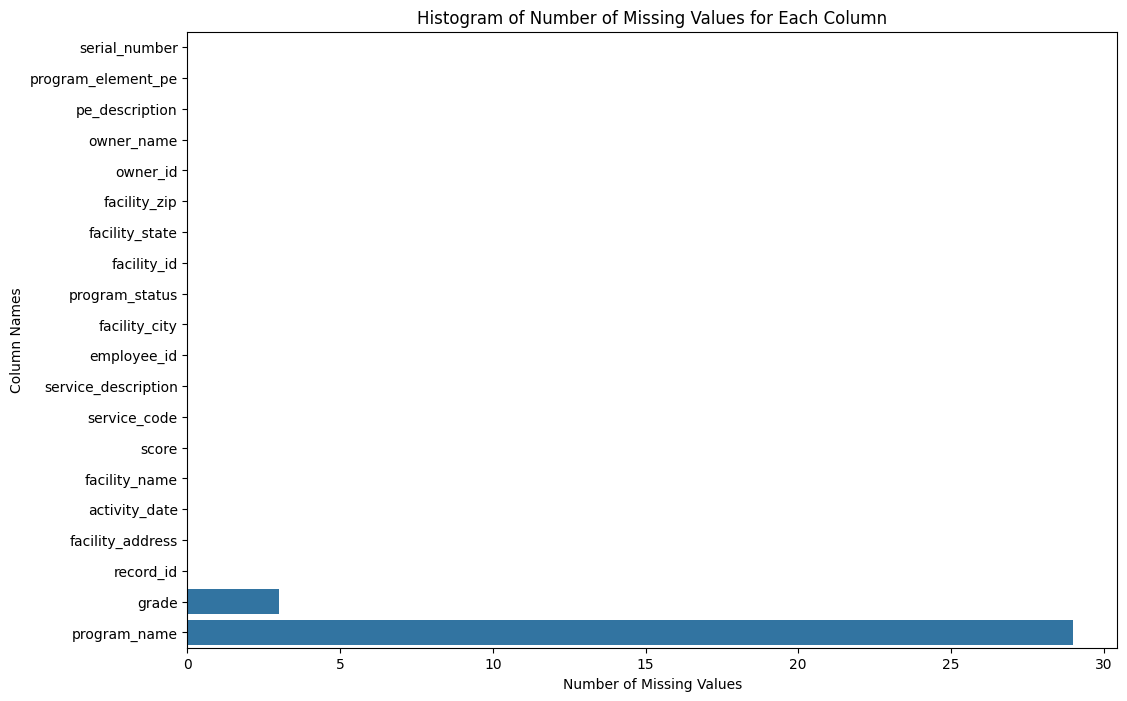

In [30]:
# Plotting the histogram
plt.figure(figsize=(12, 8))  # Create a new figure with a specified size of 12 inches by 8 inches

# Creating a bar plot using seaborn
sns.barplot(data=null_column_df, x='NaN_Count', y='Column_Name')  # Plot a bar chart with 'NaN_Count' on the x-axis and 'Column_Name' on the y-axis, using the 'viridis' color palette

# Adding a title to the plot
plt.title('Histogram of Number of Missing Values for Each Column')  # Set the title of the plot

# Labelling the x-axis
plt.xlabel('Number of Missing Values')  # Set the label for the x-axis

# Labelling the y-axis
plt.ylabel('Column Names')  # Set the label for the y-axis

# Display the plot
plt.show()

In [31]:
# Counting NaN values for each row and creating a DataFrame

# Calculating the number of NaN values in each row (axis=1), then reset the index to convert the Series into a DataFrame
null_row_df = df2.isnull().sum(axis=1).reset_index()

# Renaming the columns of the DataFrame to 'Row_Index' and 'NaN_Count'
null_row_df.columns = ['Row_Index', 'NaN_Count']

# Sorting the DataFrame by the 'NaN_Count' column in ascending order
null_row_df = null_row_df.sort_values(by='NaN_Count').reset_index(drop=True)

# Printing the DataFrame
print(null_row_df)

       Row_Index  NaN_Count
0              0          0
1          45042          0
2          45043          0
3          45044          0
4          45045          0
...          ...        ...
67568      39661          1
67569      29382          1
67570      29383          1
67571      64627          1
67572      32167          1

[67573 rows x 2 columns]


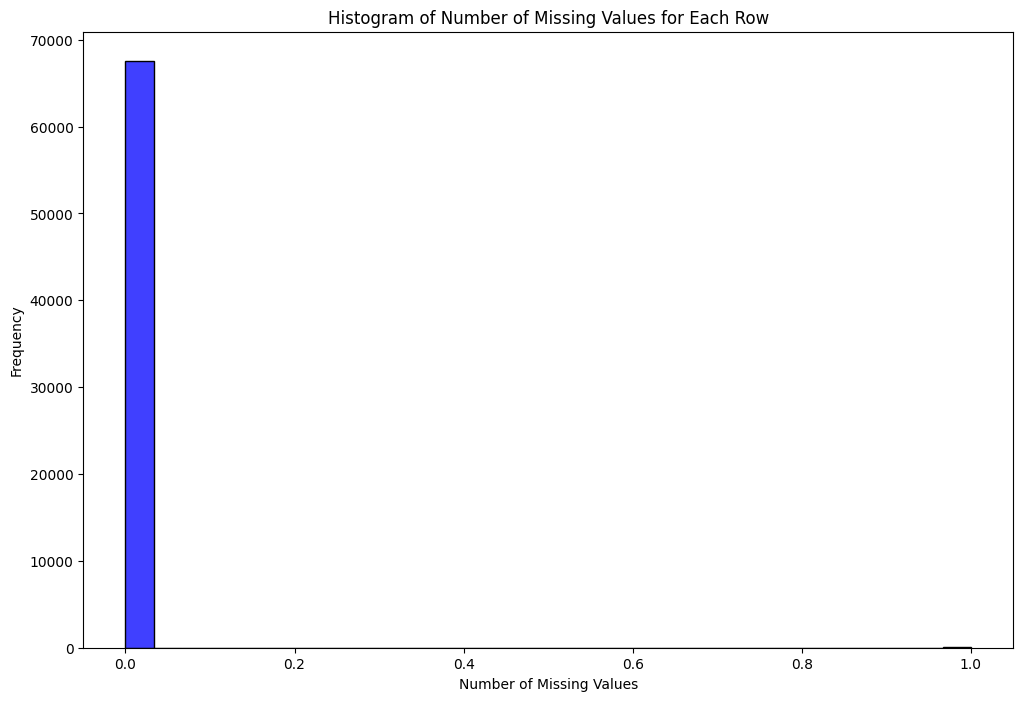

In [32]:
plt.figure(figsize=(12, 8))  # Creating a new figure with a specified size of 12 inches by 8 inches

# Creating a histogram using seaborn
sns.histplot(null_row_df['NaN_Count'], bins=30, kde=False, color='blue')  # Plotting a histogram of the 'NaN_Count' column with 30 bins, no kernel density estimate (kde), and blue color

# Adding a title to the plot
plt.title('Histogram of Number of Missing Values for Each Row')

# Labelling the x-axis
plt.xlabel('Number of Missing Values')

# Labelling the y-axis
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


In [33]:
# Impute missing values

# GRADE: Filling with the most frequent value (mode)
df2['grade'] = df2['grade'].fillna(df2['grade'].mode()[0])

# SITE COMMUNITY: Filling with the most frequent value (mode)
df2['program_name'] = df2['program_name'].fillna(df2['program_name'].mode()[0])

# Verifying that the imputation is done
missing_values_after = df2.isnull().sum()
print(missing_values_after)

# Saving the cleaned dataframe to a new CSV file
cleaned_file_path = '/content/sample_data/Restaurant_and_Market_Health_Inspections.csv'
df2.to_csv(cleaned_file_path, index=False)
print(f'Cleaned data saved to {cleaned_file_path}')


serial_number          0
activity_date          0
facility_name          0
score                  0
grade                  0
service_code           0
service_description    0
employee_id            0
facility_address       0
facility_city          0
facility_id            0
facility_state         0
facility_zip           0
owner_id               0
owner_name             0
pe_description         0
program_element_pe     0
program_name           0
program_status         0
record_id              0
dtype: int64
Cleaned data saved to /content/sample_data/Restaurant_and_Market_Health_Inspections.csv


### Observations :

*  As we can see from the above,
there are no more null entries left




In [34]:
# Printing the number of unique values in each column.

# Applying lambda function to get count of unique entires in each column
print(df2.apply(lambda col: len(col.unique())))

serial_number          67573
activity_date            860
facility_name          12071
score                     36
grade                      4
service_code               2
service_description        2
employee_id              143
facility_address       11782
facility_city              1
facility_id            13545
facility_state             1
facility_zip            1053
owner_id               11786
owner_name             11566
pe_description            30
program_element_pe        18
program_name           12928
program_status             2
record_id              14558
dtype: int64


#### Observations:

*   Since 'facility_city' and 'facility_state' have only one unique value, it will be removed from the analysis

*  The columns can be separated into discrete and continuous based on the no of unique values they have.



In [35]:
#  Dropping the columns with only one unique value
df2 = df2.loc[:, df2.nunique() > 1]

# List of continuous and categorical columns (based on a review of the dataset)

continuous_columns = ['score']
categorical_columns = ['grade', 'facility_type']

# Verifying that the columns exist in the DataFrame
continuous_columns = [col for col in continuous_columns if col in df2.columns]
categorical_columns = [col for col in categorical_columns if col in df2.columns]


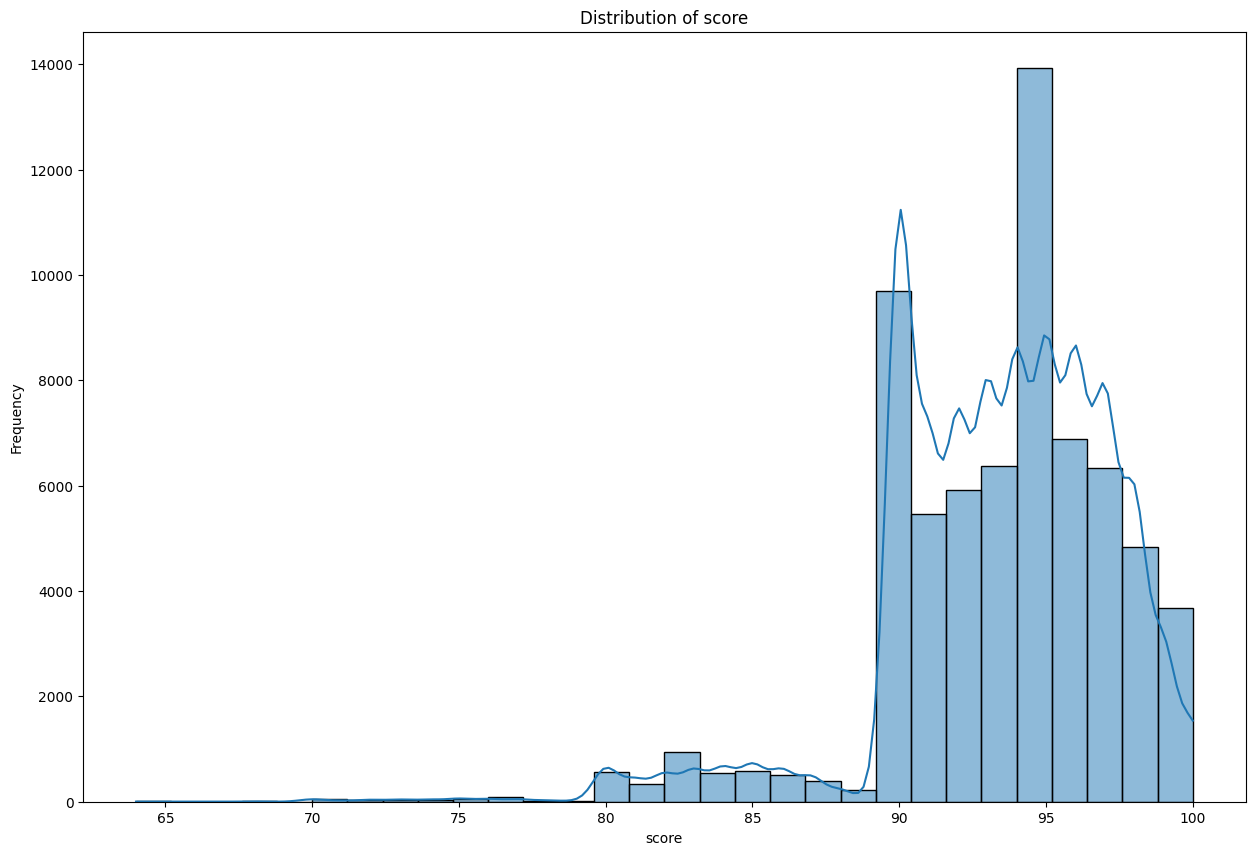

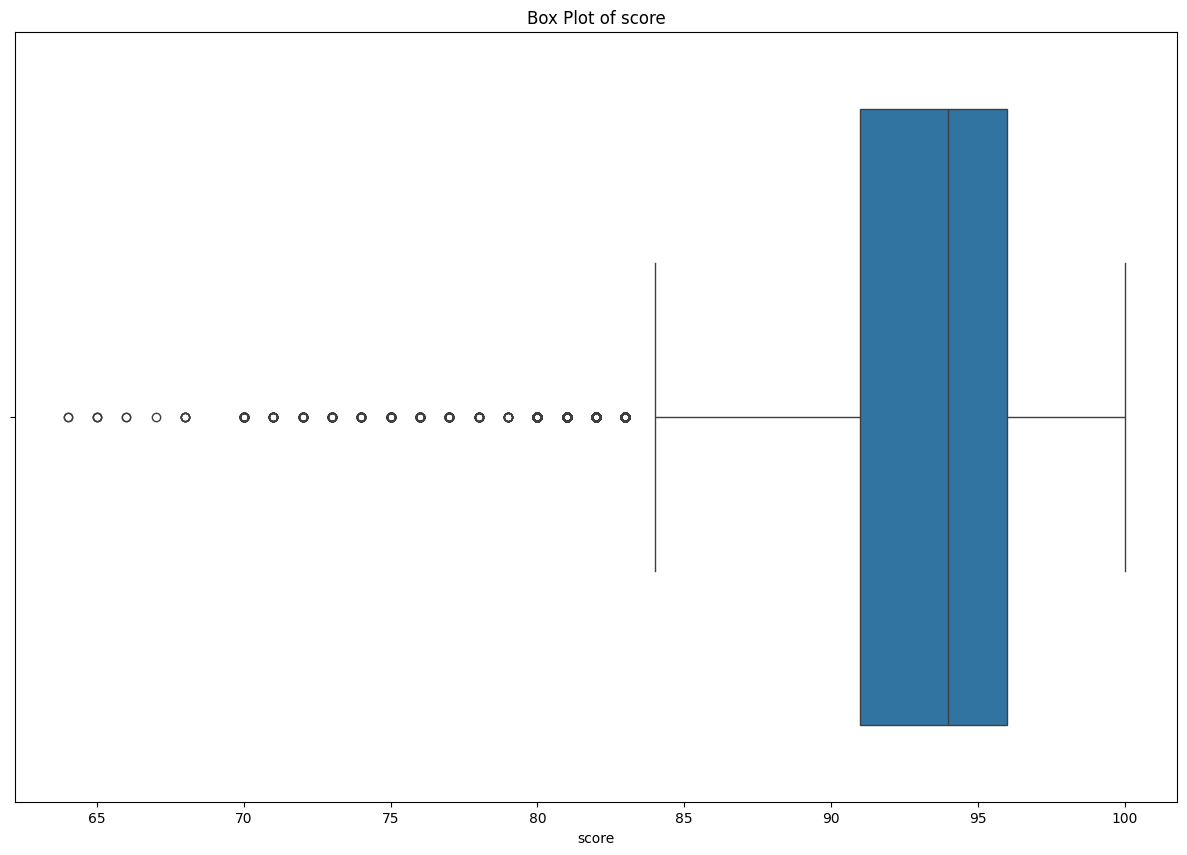

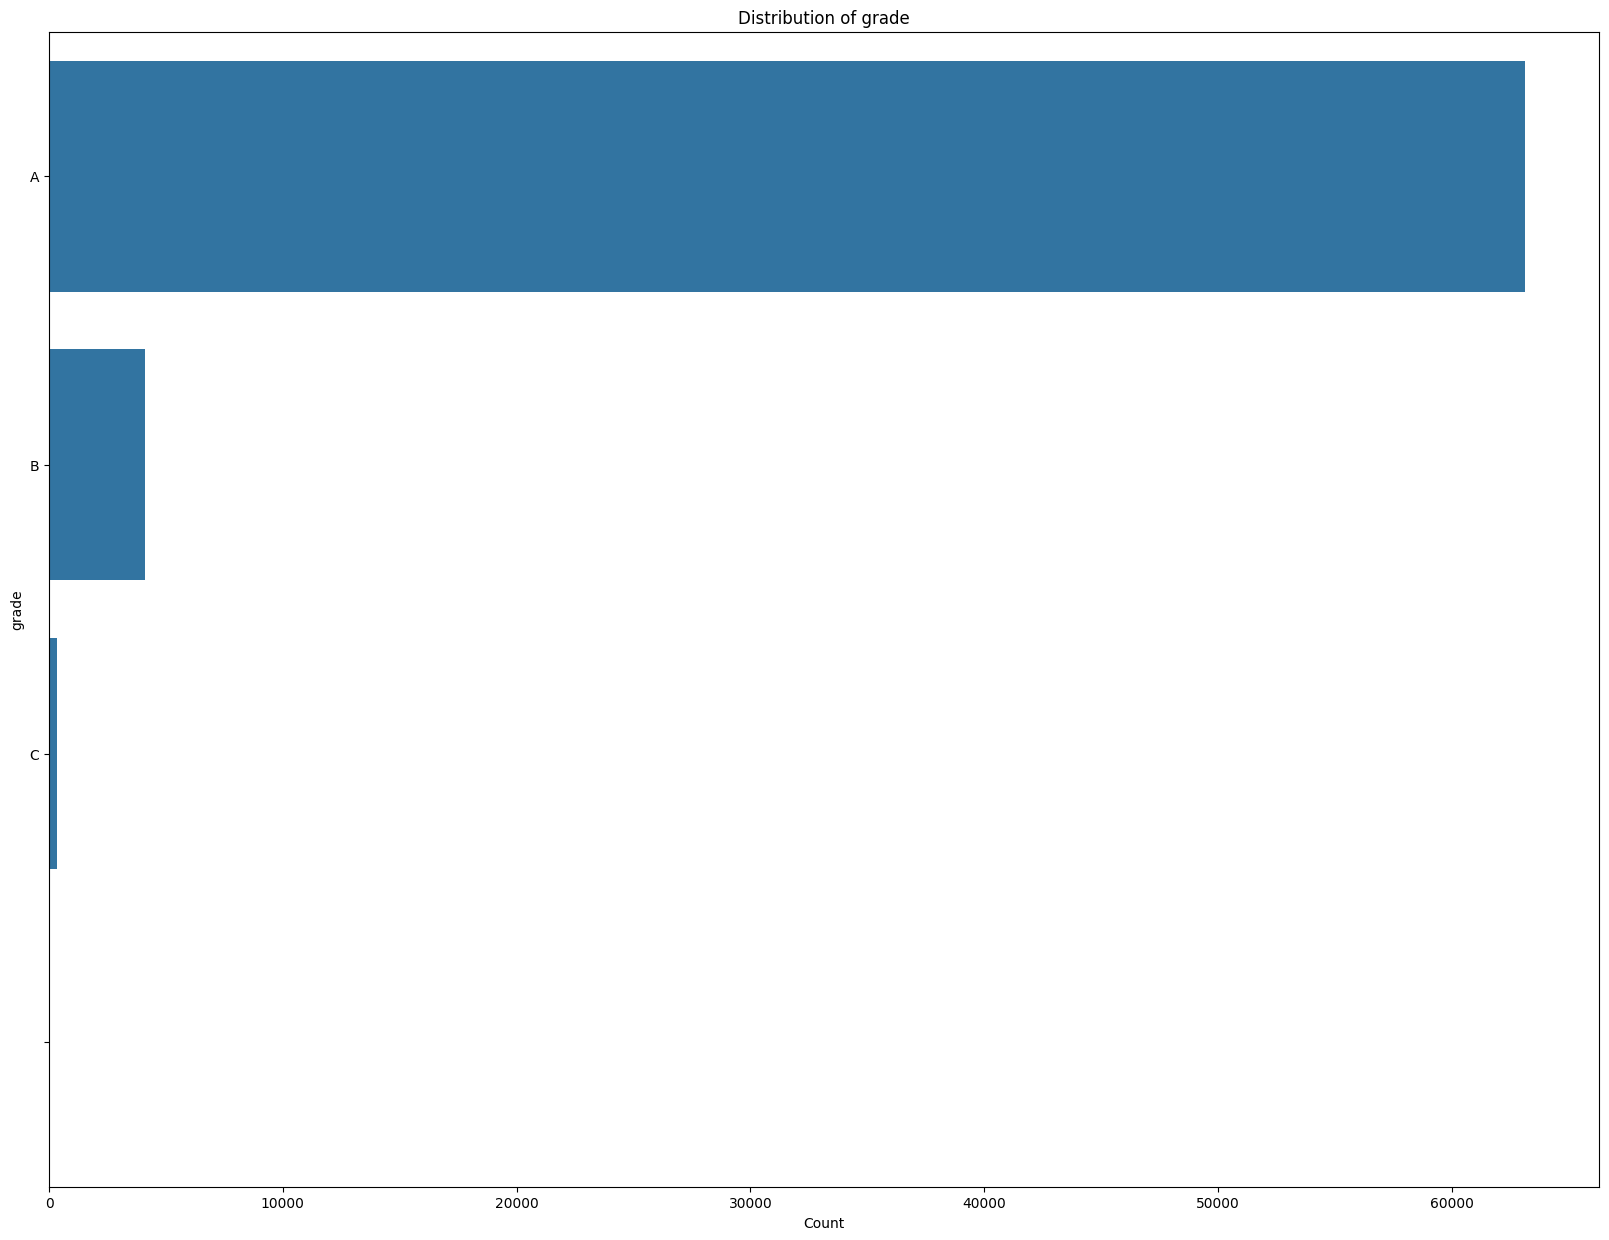

In [36]:
# Histograms for continuous variables
for col in continuous_columns:
    plt.figure(figsize=(15, 10))
    sns.histplot(df2[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#  Box plots for continuous variables
for col in continuous_columns:
    plt.figure(figsize=(15, 10))
    sns.boxplot(x=df2[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


# Bar plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(20, 15))
    sns.countplot(y=df2[col], order=df2[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()



#### Observations:


*   The score variable exhibits a right-skewed distribution, indicating that most restaurants tend to score higher on health inspections, with fewer restaurants having lower scores

*  The box plot for score reveals some outliers, meaning that a small number of restaurants have significantly lower health inspection scores compared to the majority

*  The bar plot for grade shows that most restaurants are awarded a high grade (likely an 'A'), with fewer receiving lower grades like 'B' or 'C'



#### Plotting a scatter plot for SCORES vs PROJECT TOTAL UNITS

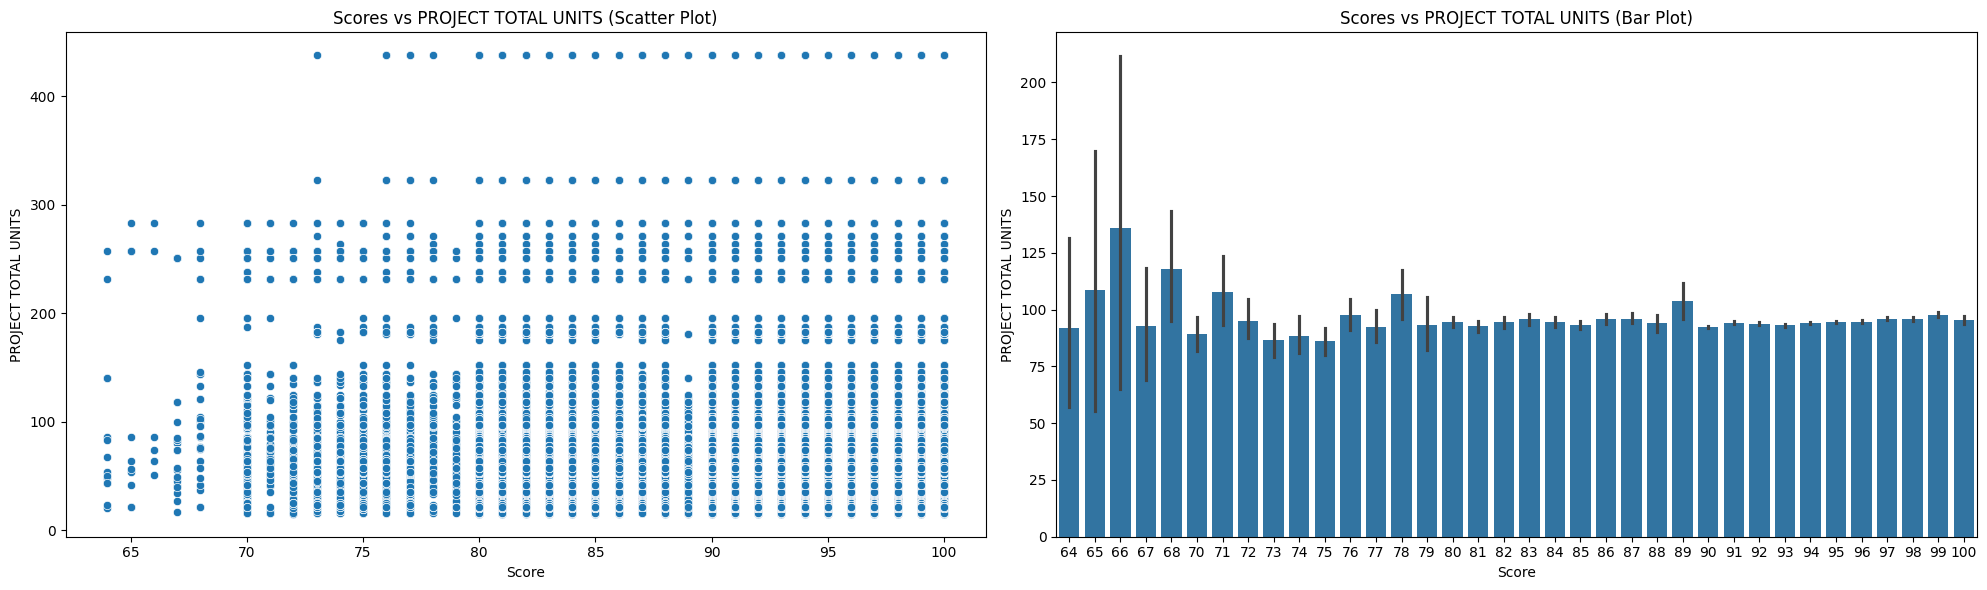

In [37]:
# Merging the DataFrames on the 'ZIP' and 'ZipCode' columns
merged_df = pd.merge(df1, df2, left_on='ZIP', right_on='facility_zip')


# Creating a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Scatter plot of PROJECT TOTAL UNITS vs scores
sns.scatterplot(ax=axes[0], x='score', y='PROJECT TOTAL UNITS', data=merged_df)
axes[0].set_title('Scores vs PROJECT TOTAL UNITS (Scatter Plot)')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('PROJECT TOTAL UNITS')

# Bar plot of PROJECT TOTAL UNITS vs scores
sns.barplot(ax=axes[1], x='score', y='PROJECT TOTAL UNITS', data=merged_df)
axes[1].set_title('Scores vs PROJECT TOTAL UNITS (Bar Plot)')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('PROJECT TOTAL UNITS')

# Adjusting layout to prevent overlap
plt.tight_layout()

# Displaying the plots
plt.show()


###  C) Summarizing each file by ZIP code using SQL



##### For summarizing each file by ZIP code using SQL, we need to load the data into pandas Dataframes and then perform SQL queries with 'pandasql' and then summarize the data by ZIP code

In [38]:
#  Installing pandasql since it is not preinstalled
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=74a036e274c15b7b97f78a962b5ffa6a2d2d4157de9bf8709ca2a1b012e5de87
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [39]:
#  Importing necessary libraries
import pandas as pd
import pandasql as psql

In [40]:
# Renaming the 'facility_zip' column to 'ZIP' in the health inspections DataFrame
df2.rename(columns={'facility_zip': 'ZIP'}, inplace=True)

file_path = '/content/sample_data/Changed_Restaurant_and_Market_Health_Inspections.csv'
df2.to_csv(file_path, index=False)
print(f'data saved to {file_path}')

data saved to /content/sample_data/Changed_Restaurant_and_Market_Health_Inspections.csv


#### Summarizing Affordable Housing Projects by ZIP Code

In [41]:
# ----------------------------------- HOUSING DATA SQL QUERY -----------------------------------

# SQL query to summarize housing data by ZIP code
# For each ZIP, calculating:
#   - total_projects: total number of projects (COUNT)
#   - total_units: total number of units (SUM)
#   - avg_units: average number of units per project (AVG)
#   - max_units: maximum number of units in a single project (MAX)

housing_query = """
SELECT ZIP,
       COUNT(*) AS total_projects,                -- Total number of housing projects per ZIP
       SUM("PROJECT TOTAL UNITS") AS total_units, -- Total number of units across all projects per ZIP
       AVG("PROJECT TOTAL UNITS") AS avg_units,   -- Average units per project in each ZIP
       MAX("PROJECT TOTAL UNITS") AS max_units    -- Maximum units in a single project per ZIP
FROM df1
GROUP BY ZIP                                      -- Group the results by ZIP code
"""

# Executing the SQL query and store the summarized housing data in a new DataFrame
housing_summary = psql.sqldf(housing_query, locals())

# Displaying the summarized housing data
print("Housing Data Summary by ZIP Code:")
print(housing_summary)

Housing Data Summary by ZIP Code:
      ZIP  total_projects  total_units   avg_units  max_units
0   90002              19         2345  123.421053        257
1   90003              21         2468  117.523810        257
2   90004              13         1124   86.461538        251
3   90005               4          690  172.500000        283
4   90006              25         2179   87.160000        232
..    ...             ...          ...         ...        ...
73  91406               2          140   70.000000         94
74  91411               1           55   55.000000         55
75  91601               4          241   60.250000         82
76  91605               4          282   70.500000        100
77  91606               2          133   66.500000        103

[78 rows x 5 columns]


In [42]:
# ----------------------------------- HEALTH DATA SQL QUERY -----------------------------------

# SQL query to summarize health inspection data by ZIP code
# For each ZIP, calculating:
#   - total_inspections: total number of inspections (COUNT)
#   - avg_score: average health inspection score (AVG)
#   - min_score: minimum health score in that ZIP (MIN)
#   - max_score: maximum health score in that ZIP (MAX)
health_query = """
SELECT ZIP,
       COUNT(*) AS total_inspections,              -- Total number of inspections in the ZIP
       AVG(score) AS avg_score,                    -- Average inspection score in the ZIP
       MIN(score) AS min_score,                    -- Minimum score in the ZIP
       MAX(score) AS max_score                     -- Maximum score in the ZIP
FROM df2
GROUP BY ZIP                           -- Group the results by ZIP code
"""

# Executing the SQL query and store the summarized health data in a new DataFrame
health_summary = psql.sqldf(health_query, locals())

# Displaying the summarized health data
print("Health Inspection Data Summary by ZIP Code:")
print(health_summary)


Health Inspection Data Summary by ZIP Code:
             ZIP  total_inspections  avg_score  min_score  max_score
0          90001               1071  93.853408         71        100
1     90001-1002                  5  92.400000         90         97
2     90001-1127                 16  95.125000         91        100
3     90001-1129                  2  90.000000         90         90
4     90001-1222                  3  91.333333         90         93
...          ...                ...        ...        ...        ...
1048       91505                  4  97.250000         95        100
1049       91601                  4  95.000000         93         97
1050       91602                  3  95.666667         95         97
1051       91604                 27  93.888889         86         98
1052       92880                  6  96.500000         94         99

[1053 rows x 5 columns]


### d) Joining the files using SQL by ZIP code

In [43]:
# Ensuring ZIP codes are of consistent length
# Converting ZIP codes to string in both datasets to avoid issues with numeric ZIP codes being misaligned
housing_summary['ZIP'] = housing_summary['ZIP'].astype(str).str.zfill(5)
health_summary['ZIP'] = health_summary['ZIP'].astype(str).str.zfill(5)

# Verifying if the ZIP codes in both datasets are in compatible formats
print(housing_summary['ZIP'].head())
print(health_summary['ZIP'].head())

# Joining the two datasets using SQL on ZIP code

# I have chosen 'total_units' as predictor variable from housing_summary and 'avg_score' as as predictor variable from health_summary
join_query = """
SELECT housing_summary.ZIP,
       housing_summary.total_units,
       health_summary.avg_score
FROM housing_summary
JOIN health_summary
ON housing_summary.ZIP = health_summary.ZIP
"""

# Executing the SQL query and store the result in a new DataFrame
joined_data = psql.sqldf(join_query, locals())

# Displaying the joined data
print(joined_data)


file_path = '/content/sample_data/joined_housing_health_data.csv'
joined_data.to_csv(file_path, index=False)
print(f'data saved to {file_path}')

0    90002
1    90003
2    90004
3    90005
4    90006
Name: ZIP, dtype: object
0         90001
1    90001-1002
2    90001-1127
3    90001-1129
4    90001-1222
Name: ZIP, dtype: object
      ZIP  total_units  avg_score
0   90002         2345  94.892562
1   90003         2468  92.795299
2   90004         1124  92.851767
3   90005          690  91.419631
4   90006         2179  92.680020
5   90007         2221  94.791974
6   90008          172  94.402299
7   90011         2603  93.401813
8   90012         1609  93.430550
9   90013         1464  94.491837
10  90014          887  94.168382
11  90015         1119  94.100966
12  90016         1272  93.468480
13  90017         2246  93.786953
14  90018         2002  94.001812
15  90019         1213  92.600617
16  90020          287  91.173066
17  90021          338  93.880081
18  90023          277  93.489571
19  90025          125  93.384099
20  90026         1770  93.295717
21  90027          722  93.776873
22  90028          897  93.683347

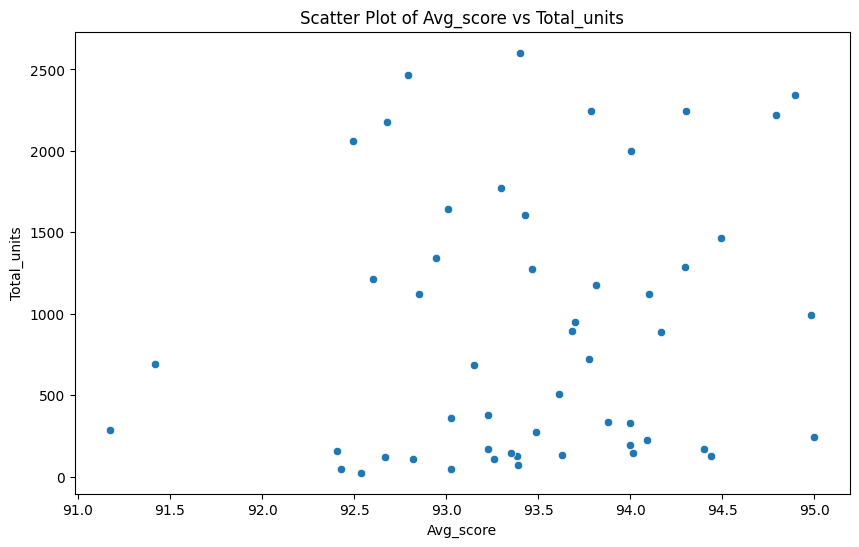

In [44]:
# Scatter plot for relationship between total_units and avg_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_score',y= 'total_units',  data = joined_data)
plt.title('Scatter Plot of Avg_score vs Total_units')
plt.xlabel('Avg_score')
plt.ylabel('Total_units')
plt.show()

### e) Formulating and testing the hypothesis

#### i. Formulating a Reasonable Alternative Hypothesis
##### Alternative Hypothesis (Hₐ): There is a significant relationship between the total number of affordable housing units in a ZIP code and the average health inspection scores of restaurants in that ZIP code.

##### Reasoning: This hypothesis suggests that as the number of affordable housing projects (or total units) changes, it affects the health inspection scores in the same ZIP code. This could be due to various socio-economic factors that influence both housing and health inspection outcomes.



#### ii. Formulating a Null Hypothesis
##### Null Hypothesis (H₀): There is no significant relationship between the total number of affordable housing units in a ZIP code and the average health inspection scores of restaurants in that ZIP code.

##### Reasoning: This hypothesis assumes that changes in the number of affordable housing projects do not impact the health inspection scores, implying that any observed correlation is due to random chance.

#### iii. Selecting an Appropriate Test and Significance Level
Test Selection:

##### Pearson Correlation Test: This test measures the strength and direction of the linear relationship between two continuous variables. It is appropriate for assessing the correlation between the number of affordable housing units and health inspection scores.

##### Linear Regression Analysis: This test evaluates the relationship between a dependent variable (health inspection scores) and one or more independent variables (total units of affordable housing). It provides insights into how much of the variance in the dependent variable can be explained by the independent variable(s).

#### Significance Level (α):

##### Using a significance level of 0.05. This means that the null hypothesis is rejected if the p-value is less than 0.05, indicating that the observed effect is statistically significant with 95% confidence.

#### Pearson Correlation Analysis

In [45]:
# Calculating the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(joined_data['total_units'], joined_data['avg_score'])

# Printing the correlation coefficient and p-value
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between total units and average scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between total units and average scores.")

Correlation Coefficient: 0.15487724426440047
p-value: 0.27293970047185245
Fail to reject the null hypothesis. There is no significant relationship between total units and average scores.


#### Linear Regression Analysis

In [46]:
import statsmodels.api as sm

# Preparing data for regression
X = joined_data['total_units']  # Independent variable
y = joined_data['avg_score']     # Dependent variable

# Adding a constant term to the predictor (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Printing the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              avg_score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.229
Date:                Tue, 14 Jan 2025   Prob (F-statistic):              0.273
Time:                        14:04:17   Log-Likelihood:                -61.865
No. Observations:                  52   AIC:                             127.7
Df Residuals:                      50   BIC:                             131.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          93.3383      0.168    554.437      

### RESULTS:






*  Correlation Coefficient: 0.1549


* Conclusion: Weak positive linear relationship between total units and average scores.
*  p-value: 0.273

* Conclusion: Not statistically significant (typically, p-value > 0.05 means no significant correlation).

* OLS Regression Analysis:

* R-squared: 0.024
* Conclusion: The model explains only 2.4% of the variance in average scores. The explanatory power of the model is very low.
* Coefficient for total_units: 0.0002
* Conclusion: The coefficient is very small and not statistically significant. There is no meaningful impact of total units on average scores.







### CONCLUSION:


* Hypothesis Testing:

* Fail to Reject the Null Hypothesis: There is no significant relationship between total units and average scores.

*  Practical Implication: The analysis indicates that total units of affordable housing projects have a negligible effect on average health inspection scores, and the relationship is not statistically significant.








## Question 2:

Data: Data from Indian government data portal https://www.data.gov.in

* https://www.data.gov.in/resource/stateut-wise-district-score-during-2021-22

#### Performing EDA on the data

### Importing required libraries and packages

In [ ]:
# Importing the necessary libraries and packages

import numpy as np   # For Numerical operations
import pandas as pd  # For Data manipulation
import matplotlib.pyplot as plt  # For Data visualization
import seaborn as sns   # For Statistical data visualization
import scipy.stats as stats  # For Statistical functions


### Uploading data files


In [ ]:
# Uploading the data files

# Colab-specific library to load files
from google.colab import files

# Uploading the given data files
uploaded = files.upload()

# Confirming the upload
for fn in uploaded.keys():
  print('You uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving District_PGI_Table_1.csv to District_PGI_Table_1 (1).csv
You uploaded file "District_PGI_Table_1 (1).csv" with length 43549 bytes


### Exploring the Housing data


In [ ]:
# reading the csv file into a pandas dataframe
df = pd.read_csv('District_PGI_Table_1.csv')

# printing first five rows of the dataframe to get an overview of the data
df.head()


Sl. No.                     State/UT                   District  Grade  \
0        1  Andaman and Nicobar Islands  Middle and North Andamans  Uttam   
1        2  Andaman and Nicobar Islands                   Andamans  Uttam   
2        3  Andaman and Nicobar Islands                   Nicobars  Uttam   
3        4               Andhra Pradesh              Visakhapatnam  Uttam   
4        5               Andhra Pradesh                     Guntur  Uttam   

   District score 2021-22 - Overall  \
0                               381   
1                               375   
2                               367   
3                               397   
4                               393   

   District score 2021-22 - Category - 1.Outcome (290)  \
0                                                139     
1                                                134     
2                                                134     
3                                                153     
4                                                146     

   District score 2021-22 - Category - 2. ECT (90)  \
0                                               85   
1                                               86   
2                                               85   
3                                               84   
4                                               86   

   District score 2021-22 - Category - 3. IF&SE (51)  \
0                                                 39   
1                                                 38   
2                                                 40   
3                                                 41   
4                                                 36   

   District score 2021-22 - Category - 4.SS&CP (35)  \
0                                                32   
1                                                30   
2                                                33   
3                                                35   
4                                                35   

   District score 2021-22 - Category - 5. DL (50)  \
0                                              15   
1                                              22   
2                                              16   
3                                              18   
4                                              16   

   District score 2021-22 - Category - 6. GP (84)  
0                                              69  
1                                              63  
2                                              59  
3                                              66  
4                                              74

In [ ]:
# Printing the number of columns and rows
print('Number of Rows =', df.shape[0])  # printing no of rows
print('Number of Columns =', df.shape[1])  # printing no of columns

Number of Rows = 748
Number of Columns = 11


In [ ]:
# Printing the datatype of each column
print(df.dtypes)

Sl. No.                                                 int64
State/UT                                               object
District                                               object
Grade                                                  object
District score 2021-22 - Overall                        int64
District score 2021-22 - Category - 1.Outcome (290)     int64
District score 2021-22 - Category - 2. ECT (90)         int64
District score 2021-22 - Category - 3. IF&SE (51)       int64
District score 2021-22 - Category - 4.SS&CP (35)        int64
District score 2021-22 - Category - 5. DL (50)          int64
District score 2021-22 - Category - 6. GP (84)          int64
dtype: object



### Observations:

*   From the above results it is clear all the columns have correct datatypes so there is no need to change the datatype of any column





In [ ]:
# Count NaN values for each column and create a DataFrame

# Calculating the number of NaN values in each column, and reset the index to convert the Series into a DataFrame
null_column_df = df.isnull().sum().reset_index()

# Renaming the columns of the DataFrame to 'Column_Name' and 'NaN_Count'
null_column_df.columns = ['Column_Name', 'NaN_Count']

# Sort the DataFrame by the 'NaN_Count' column in ascending order and reset the index
null_column_df = null_column_df.sort_values(by='NaN_Count').reset_index(drop=True)

# Print the DataFrame
print(null_column_df)

                                          Column_Name  NaN_Count
0                                             Sl. No.          0
1                                            State/UT          0
2                                            District          0
3                                               Grade          0
4                    District score 2021-22 - Overall          0
5   District score 2021-22 - Category - 1.Outcome ...          0
6     District score 2021-22 - Category - 2. ECT (90)          0
7   District score 2021-22 - Category - 3. IF&SE (51)          0
8    District score 2021-22 - Category - 4.SS&CP (35)          0
9      District score 2021-22 - Category - 5. DL (50)          0
10     District score 2021-22 - Category - 6. GP (84)          0




* There are no NaN values in any column




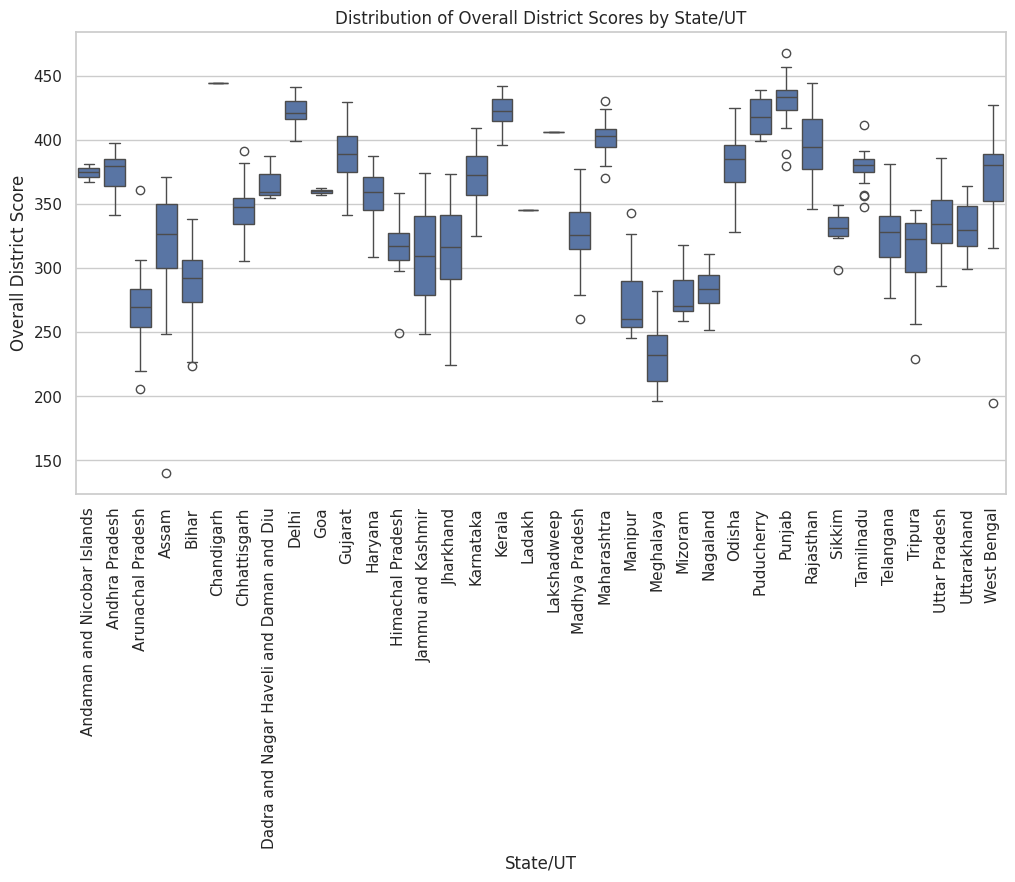

<ipython-input-53-d3c1276574ca>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Grade', y='District score 2021-22 - Overall', data=df, ci=None)


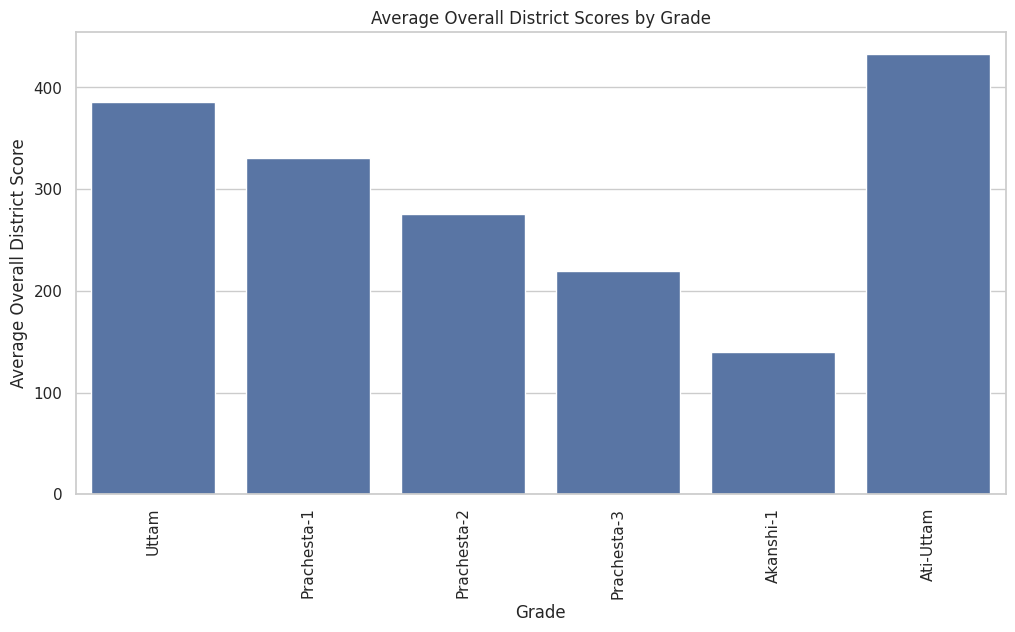

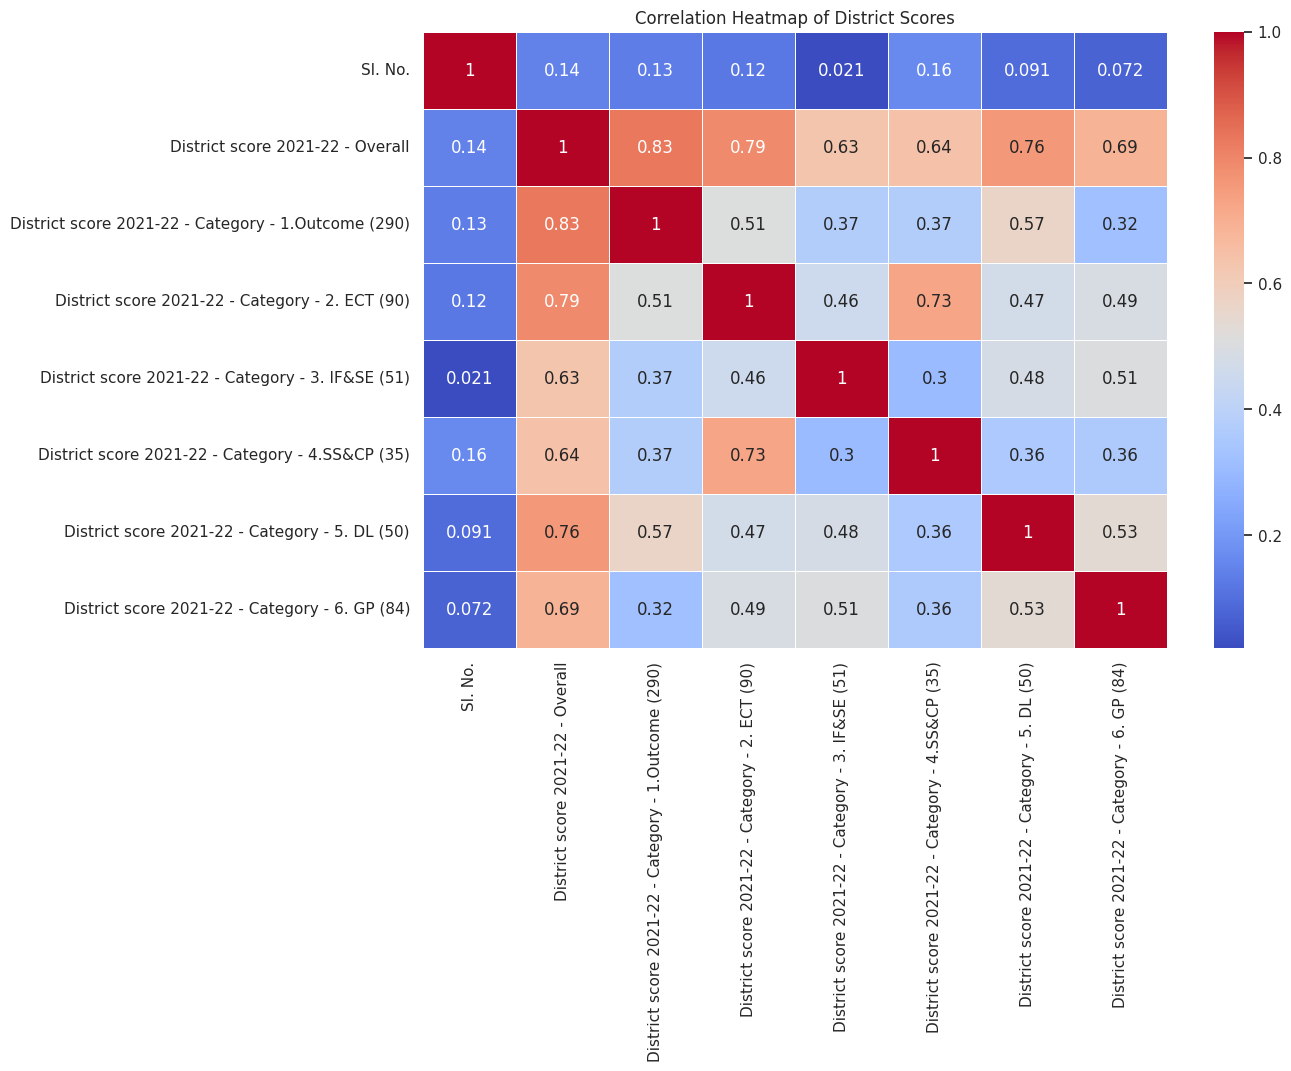

<Figure size 1400x1000 with 0 Axes>

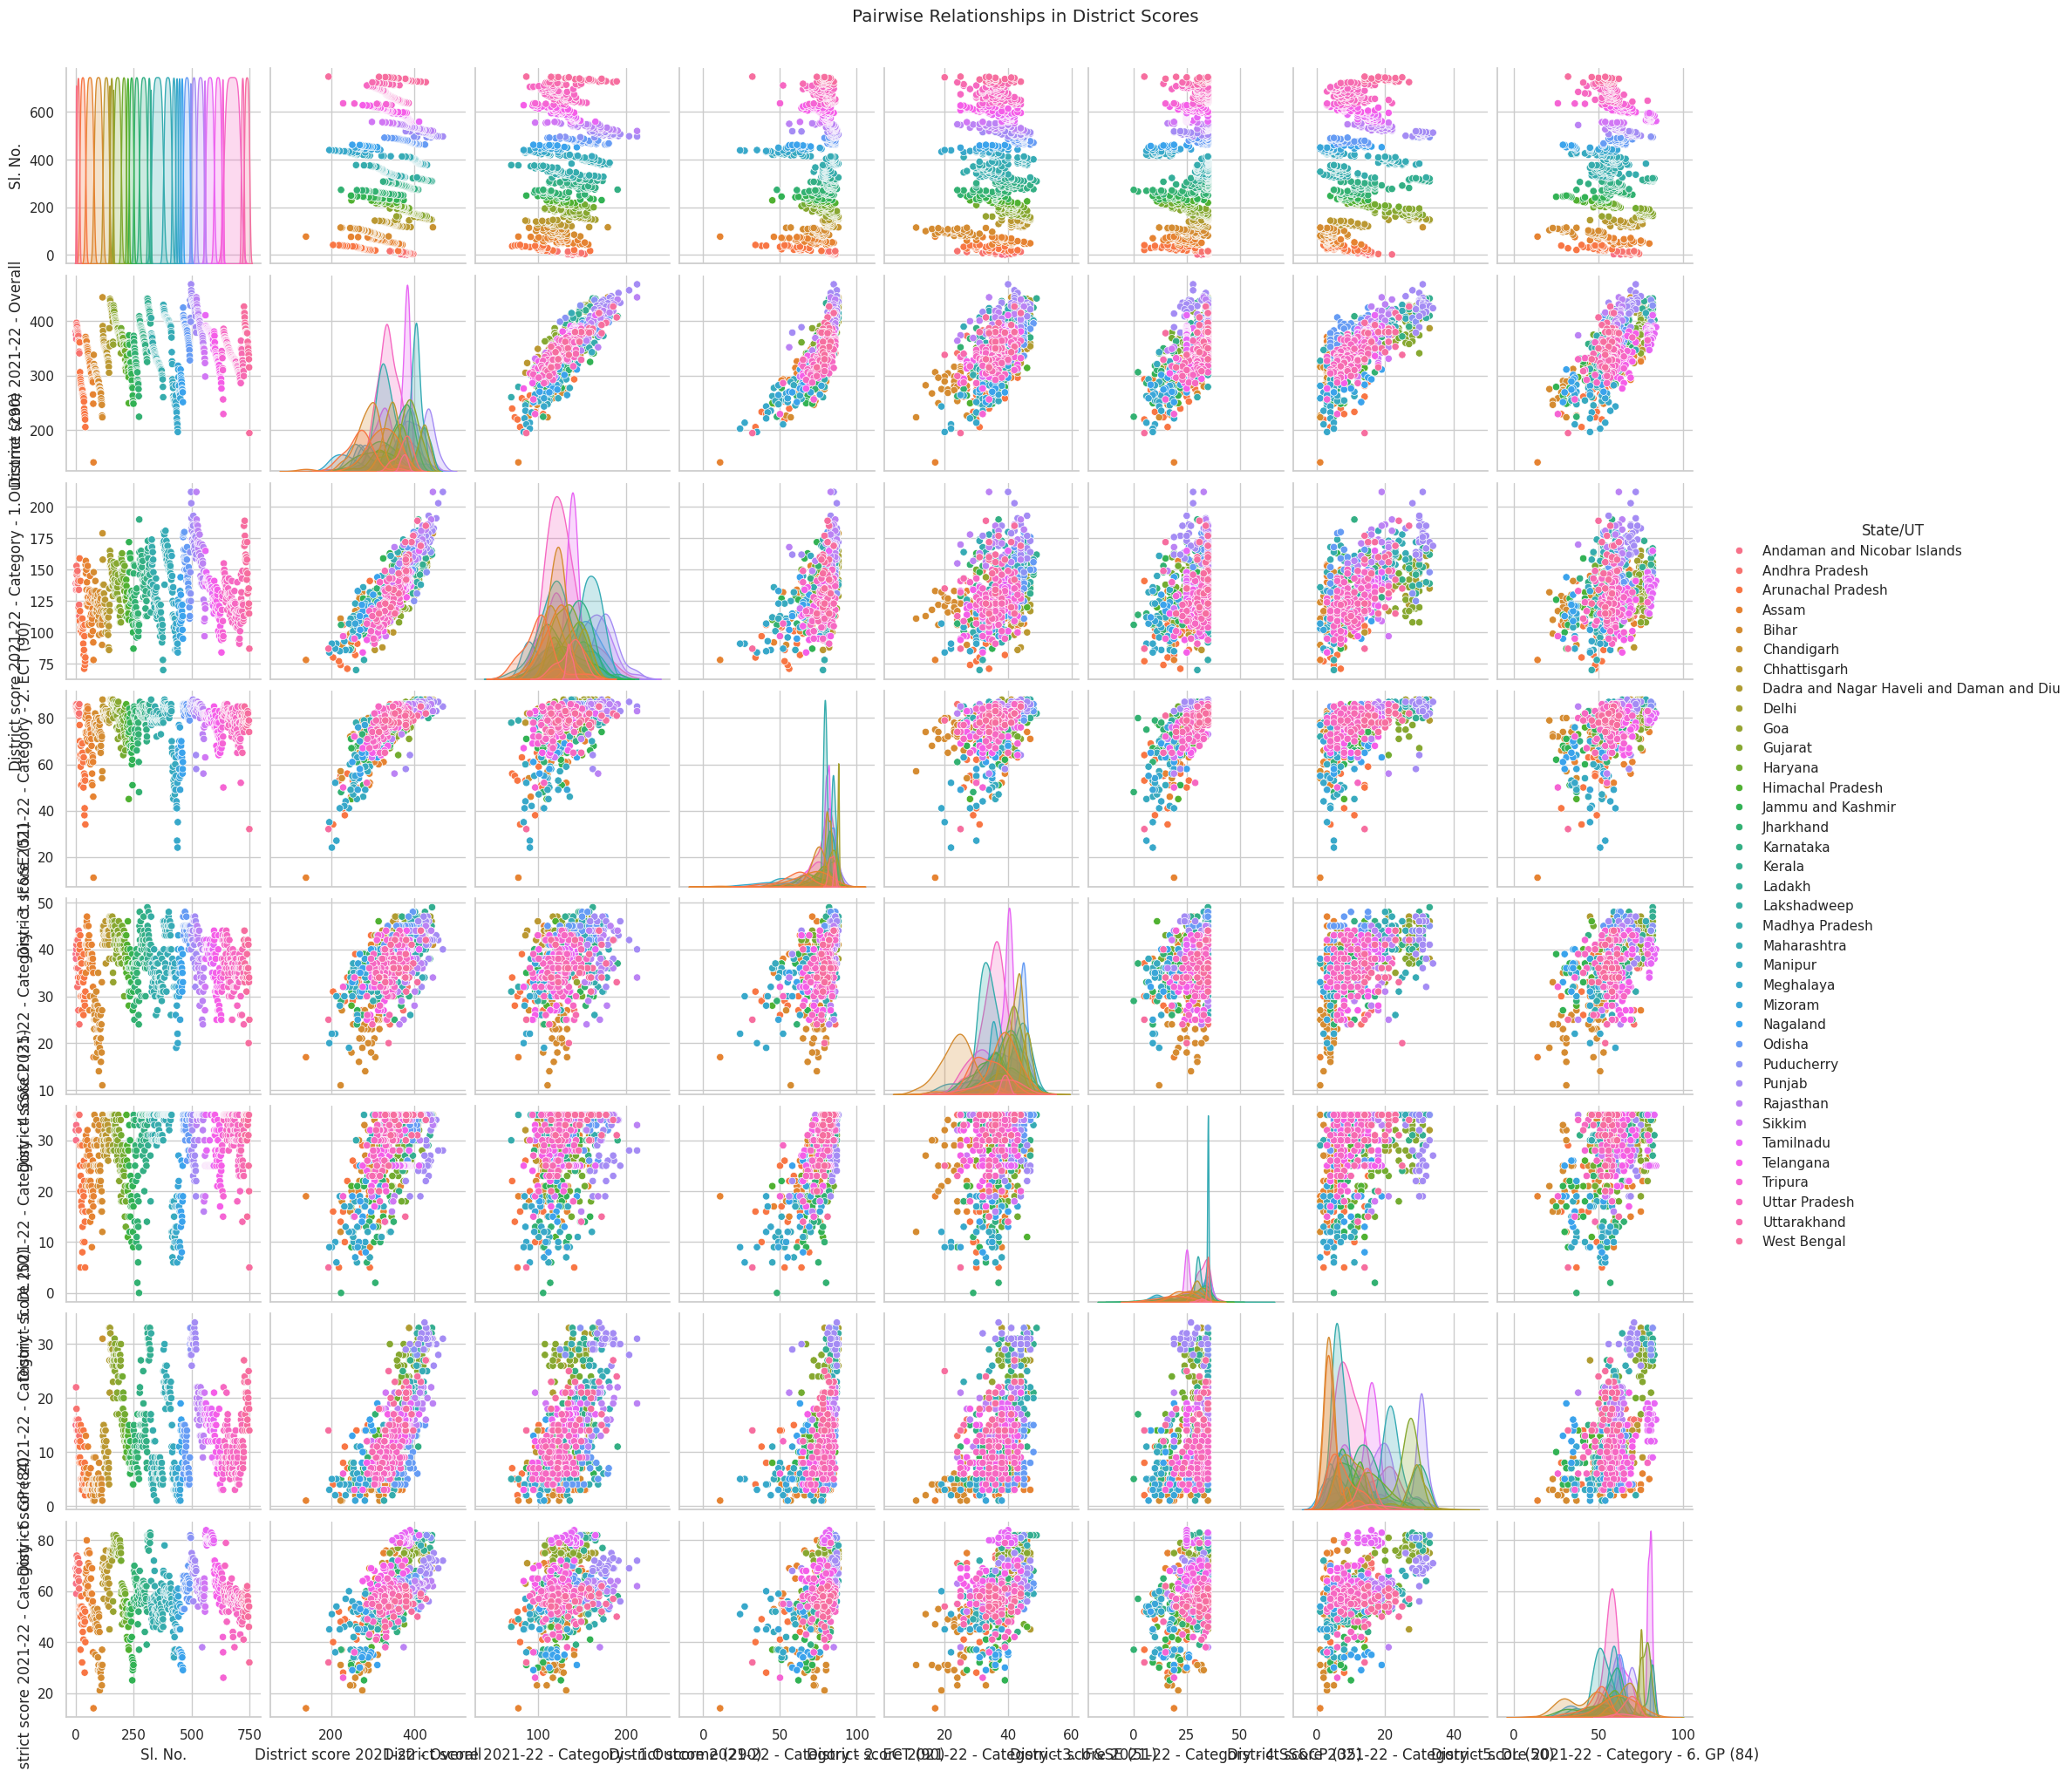

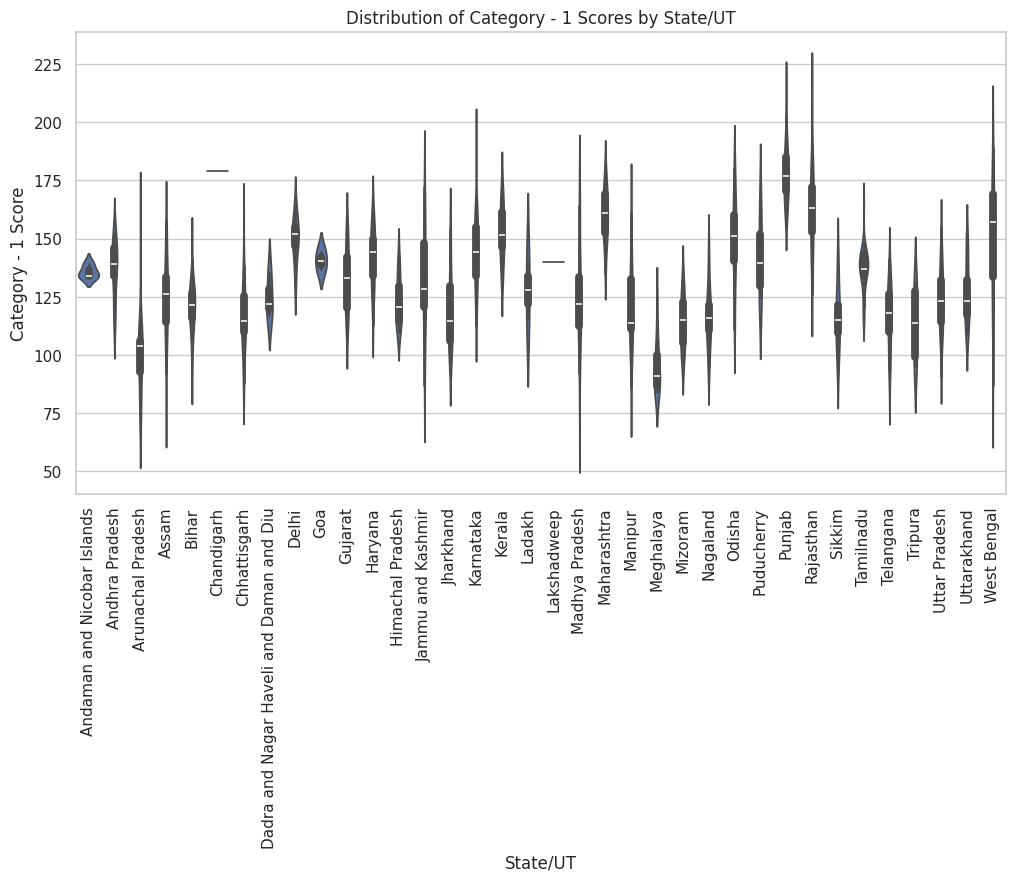

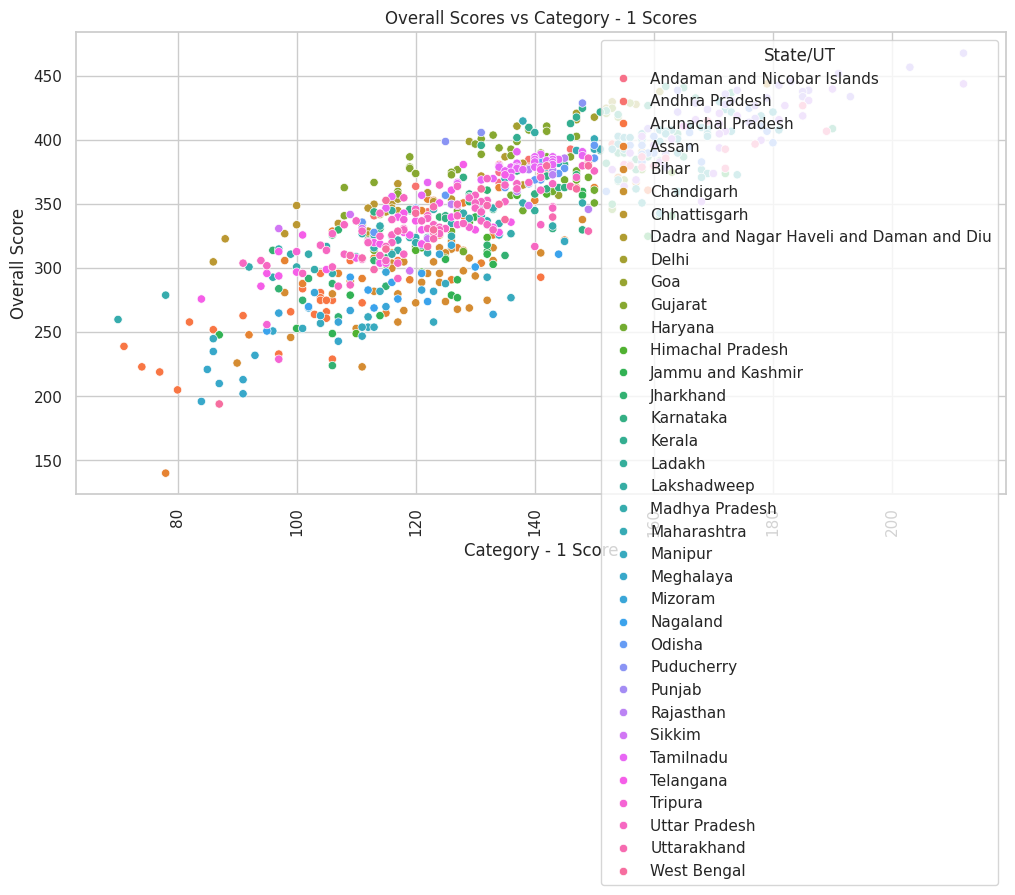

In [ ]:
# Setting the style of seaborn
sns.set(style="whitegrid")

# Box plot to show the distribution of overall district scores by State/UT
plt.figure(figsize=(12, 6))
sns.boxplot(x='State/UT', y='District score 2021-22 - Overall', data=df)
plt.title('Distribution of Overall District Scores by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Overall District Score')
plt.xticks(rotation=90)
plt.show()

# Bar plot to show the average scores by grade
plt.figure(figsize=(12, 6))
sns.barplot(x='Grade', y='District score 2021-22 - Overall', data=df, ci=None)
plt.title('Average Overall District Scores by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Overall District Score')
plt.xticks(rotation=90)
plt.show()

# Selecting only the numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=['number'])

# Heatmap to show the correlation between different scores
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of District Scores')
plt.show()

# Pairplot to show pairwise relationships in the dataset
plt.figure(figsize=(14, 10))
sns.pairplot(df, hue='State/UT')
plt.suptitle('Pairwise Relationships in District Scores', y=1.02)
plt.show()

# Violin plot to show the distribution of scores in Category - 1 by State/UT
plt.figure(figsize=(12, 6))
sns.violinplot(x='State/UT', y='District score 2021-22 - Category - 1.Outcome (290)', data=df)
plt.title('Distribution of Category - 1 Scores by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Category - 1 Score')
plt.xticks(rotation=90)
plt.show()

# Scatter plot to show the relationship between overall scores and Category - 1 scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='District score 2021-22 - Category - 1.Outcome (290)', y='District score 2021-22 - Overall', hue='State/UT', data=df)
plt.title('Overall Scores vs Category - 1 Scores')
plt.xlabel('Category - 1 Score')
plt.ylabel('Overall Score')
plt.xticks(rotation=90)
plt.show()

#### Pearson Correlation Analysis

In [ ]:
# Calculating the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(df['District score 2021-22 - Category - 1.Outcome (290)'], df['District score 2021-22 - Category - 3. IF&SE (51)'])

# Printing the correlation coefficient and p-value
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between District score 2021-22 - Category - 1.Outcome (290) and District score 2021-22 - Category - 3. IF&SE (51)")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between District score 2021-22 - Category - 1.Outcome (290) and District score 2021-22 - Category - 3. IF&SE (51)")

Correlation Coefficient: 0.3744515308514201
p-value: 2.60709296848863e-26
Reject the null hypothesis. There is a significant relationship between District score 2021-22 - Category - 1.Outcome (290) and District score 2021-22 - Category - 3. IF&SE (51)


## REFERENCES:




MLforSmartMonkeys.ipynb
    [ https://drive.google.com/file/d/1EFD41FXykmgTP7f9KEGLIEPk5sAVfkQv/view?usp=drive_link ]

























# ***THANKYOU 😃***